* How to choose an appropriate prior distribution
* Prior's influence changes as our dataset increases
* An interesting relationship between priors and penalties on linear regression

## Getting our priorities straight

### Subjective vs Objective priors

2 classes of Bayesian priors:

* Objective: allow the data to influence the posterior
* Subjective: allow the practitioner to express his or her views into the prior

"The principle of Indifference": we have no prior reason to favor one value over another. Calling a flat prior over a restricted space an objective prior is not correct.

Example: if we know $p$ in a Binomial model is greater than 0.5, then $\text{Uniform }(0.5, 1)$ is not an objective prior. The flat prior must be flat along the *entire* range of possibilities.

#### Subjective Priors

If we add more probability mass to certain areas of the prior, and less elsewhere, we are biasing our inference towards the unknowns existing in the former area. This is known as a subjective, or *informative* prior.

A subjective prior can also be used to inject *domain knowledge* of the problem into the model.

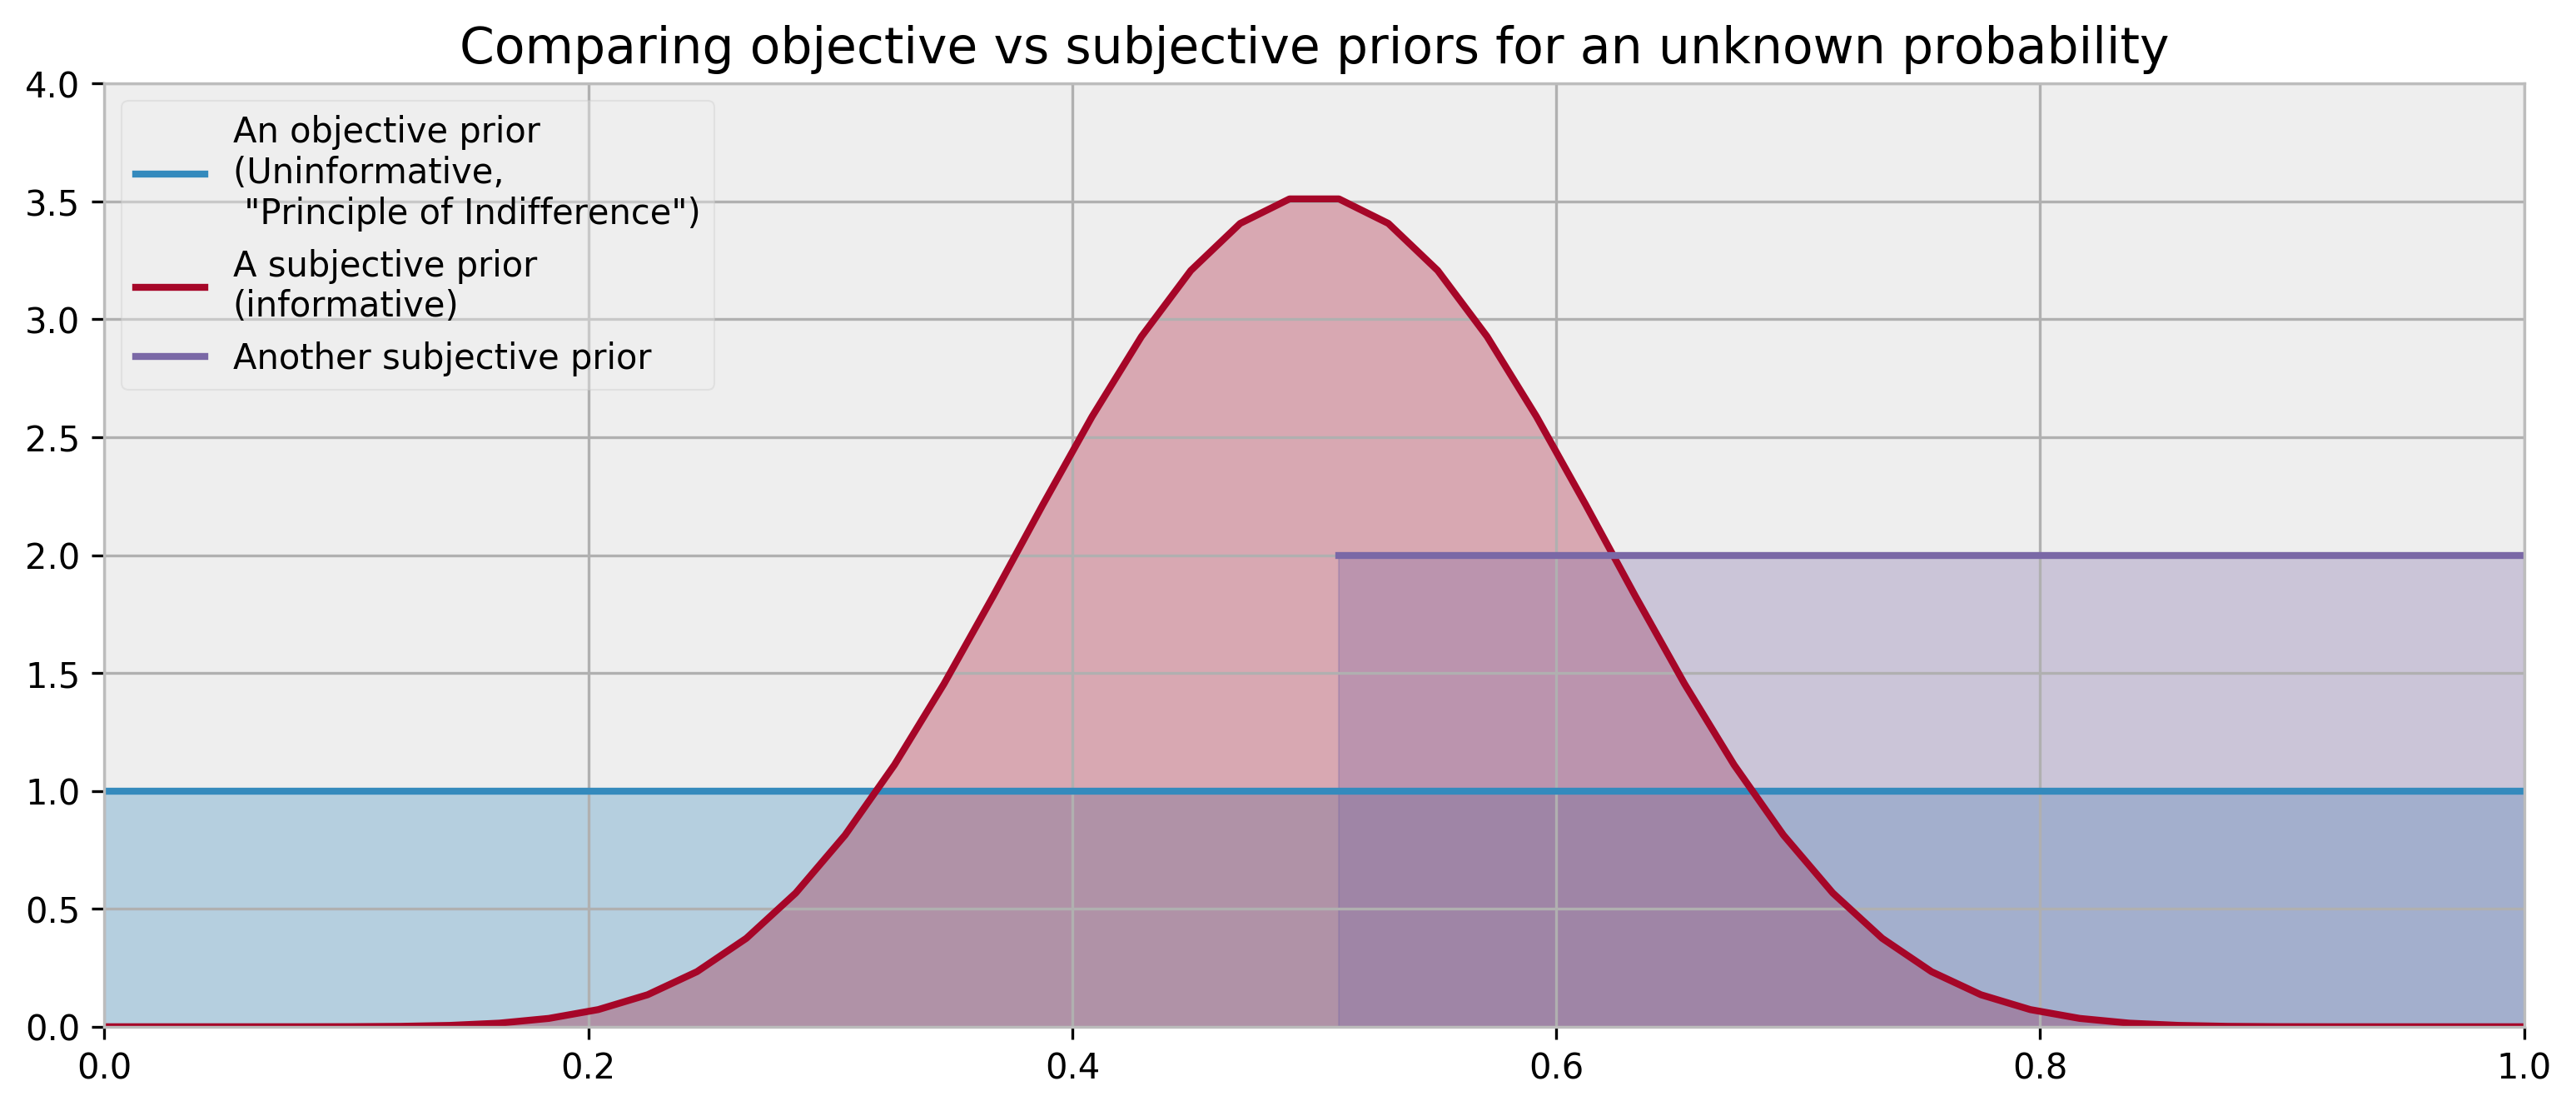

In [3]:
figsize(12.5, 5)

colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

p = plt.plot(x, y1,
         label='An objective prior \n(Uninformative, \n "Principle of Indifference")')
plt.fill_between(x, 0, y1, color=p[0].get_color(), alpha=0.3)
p = plt.plot(x, y2,
         label="A subjective prior \n(informative)")
plt.fill_between(x, 0, y2, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x[25:], 2*np.ones(25), label="Another subjective prior")
plt.fill_between(x[25:], 0, 2, color=p[0].get_color(), alpha=0.3)

plt.ylim(0, 4)
plt.xlim(0, 1)
leg = plt.legend(loc="upper left")
leg.get_frame().set_alpha(0.4)
plt.title("Comparing objective vs subjective priors for an unknown probability");

### Decision, decisions...

> ... after the model has been fit, one should look at the posterior distribution and see if it makes sense. If the posterior distribution does not make sense, this implies that additional prior knowledge is available that has not been included in the model, and that contradicts the assumptions of the prior distribution that has been used. It is then appropriate to go back and alter the prior distribution to be more consistent with this external knowledge.

If the posterior does not make sense, then clearly one had an idea what the posterior *should* look like (not what one *hopes* it looks like), implying that the current prior does not contain all the prior information and should be updated. We can discard the current prior and choose a more reflective one.

### Empirical Bayes

Empirical Bayes combines the two methods by using frequentist methods to select hyperparameter $\alpha$, and then proceeds with Bayesian methods on the original problem.

Simple example estimate the parameter $\mu$ of a Normal distribution, with $\sigma = 5$. Since $\mu$ could range over the whole real line, we could use Normal distribution as a prior for $\mu$. How to select the prior's hyperparameters, denoted ($\mu_p, \sigma_p^2$. We have 2 options:

1. Empirical Bayes suggests using the empirical sample mean

$$ \mu_p = \frac{1}{N} \sum_{i=0}^N X_i $$

2. Traditional Bayesian inference suggests using prior knowledge, or a more objective prior (zero mean and fat standard deviation).

Empirical Bayes is *double-counting* the data. Using Empirical Bayese when you have *lots* of observations.

All priors should be specified *before* we observe the data, so that the data does not influence our prior opinions (Daniel Kahneman et.al about [alchoring](https://en.wikipedia.org/wiki/Anchoring))

### Useful priors to know about

#### The Gamma distribution

$X \sim \text{Gamma }(\alpha, \beta)$ is a random variable over the positive real numbers. It is a generalization of the Exponential random variable.

$$\text{Exp }(\beta) \sim \text{Gamma }(1, \beta) $$

This additional parameter allows the probability density function to have more flexibility, hence allowing the practitioner to express his subjective priors more accurately. The density function for $\text{Gamma }(\alpha, \beta)$ random variable is:

$$f(x | \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1}e^{-\beta x}}{\Gamma(\alpha)}$$

where $\Gamma(\alpha)$ is the Gamma function.

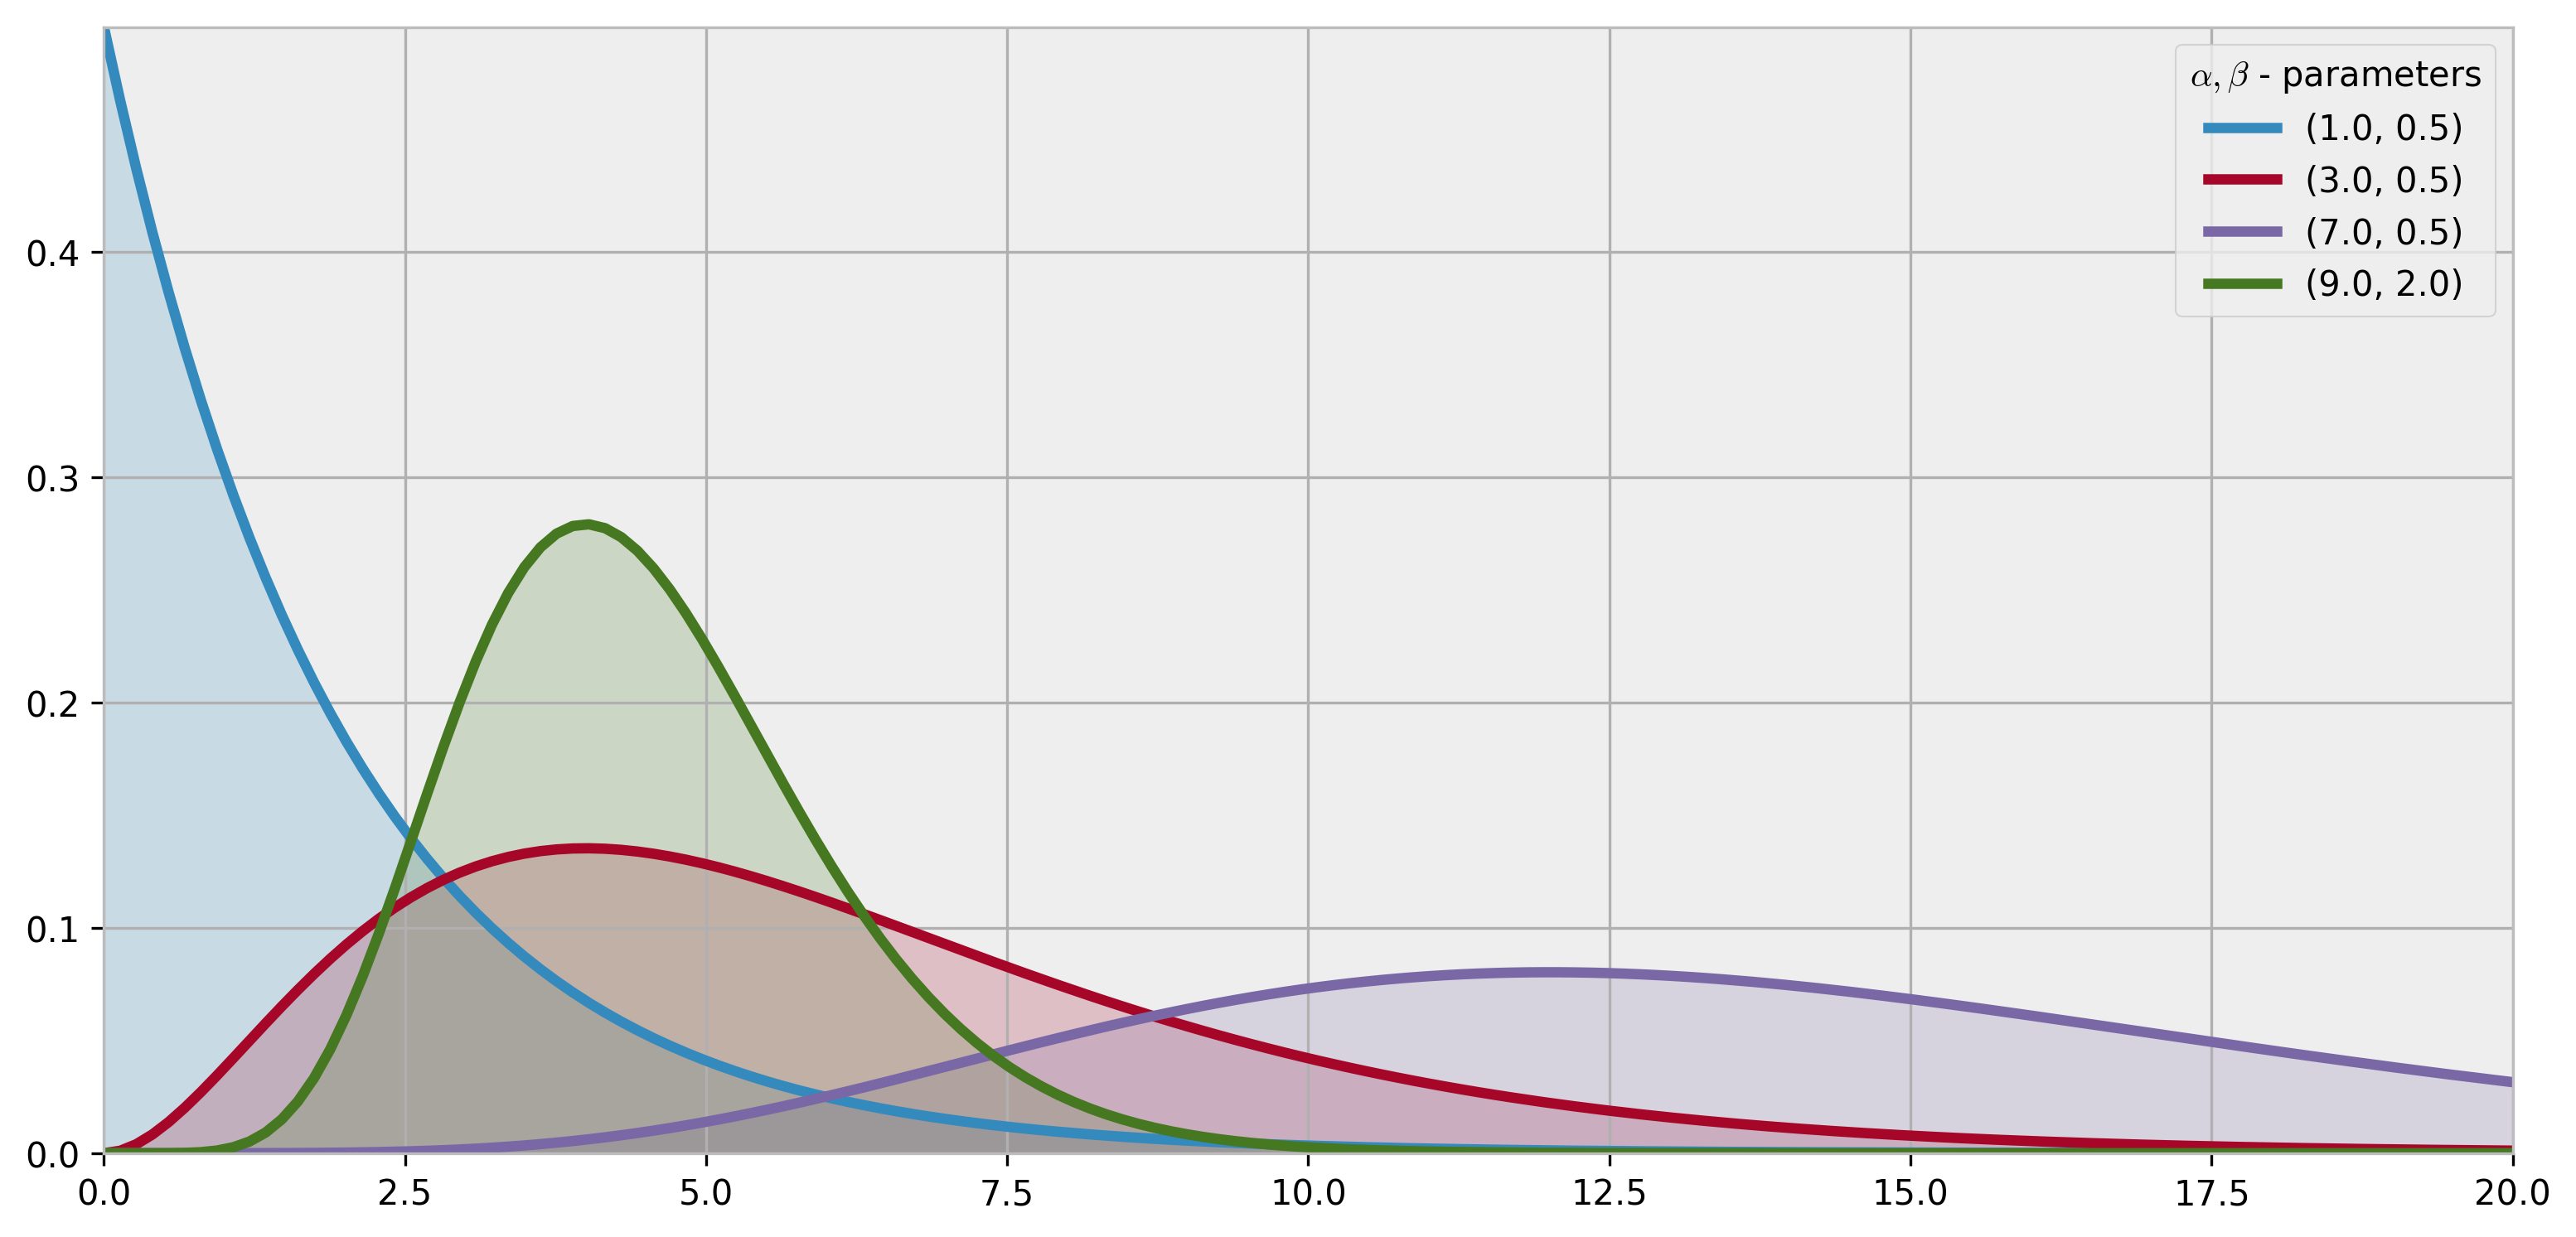

In [4]:
figsize(12.5, 6)
gamma = stats.gamma

parameters = [(1,0.5), (3,0.5), (7, 0.5), (9,2)]
x = np.linspace(0.001, 20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = plt.plot(x, y, label="(%.1f, %.1f)"%(alpha, beta), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.legend(title=r"$\alpha, \beta$ - parameters");

#### The Wishart distribution

The Wishart distribution is a distribution over all Positive semi-definite matrices.
Covariance matrices are positive-definite, hence the wishart is an appropriate prior for covariance matrices.

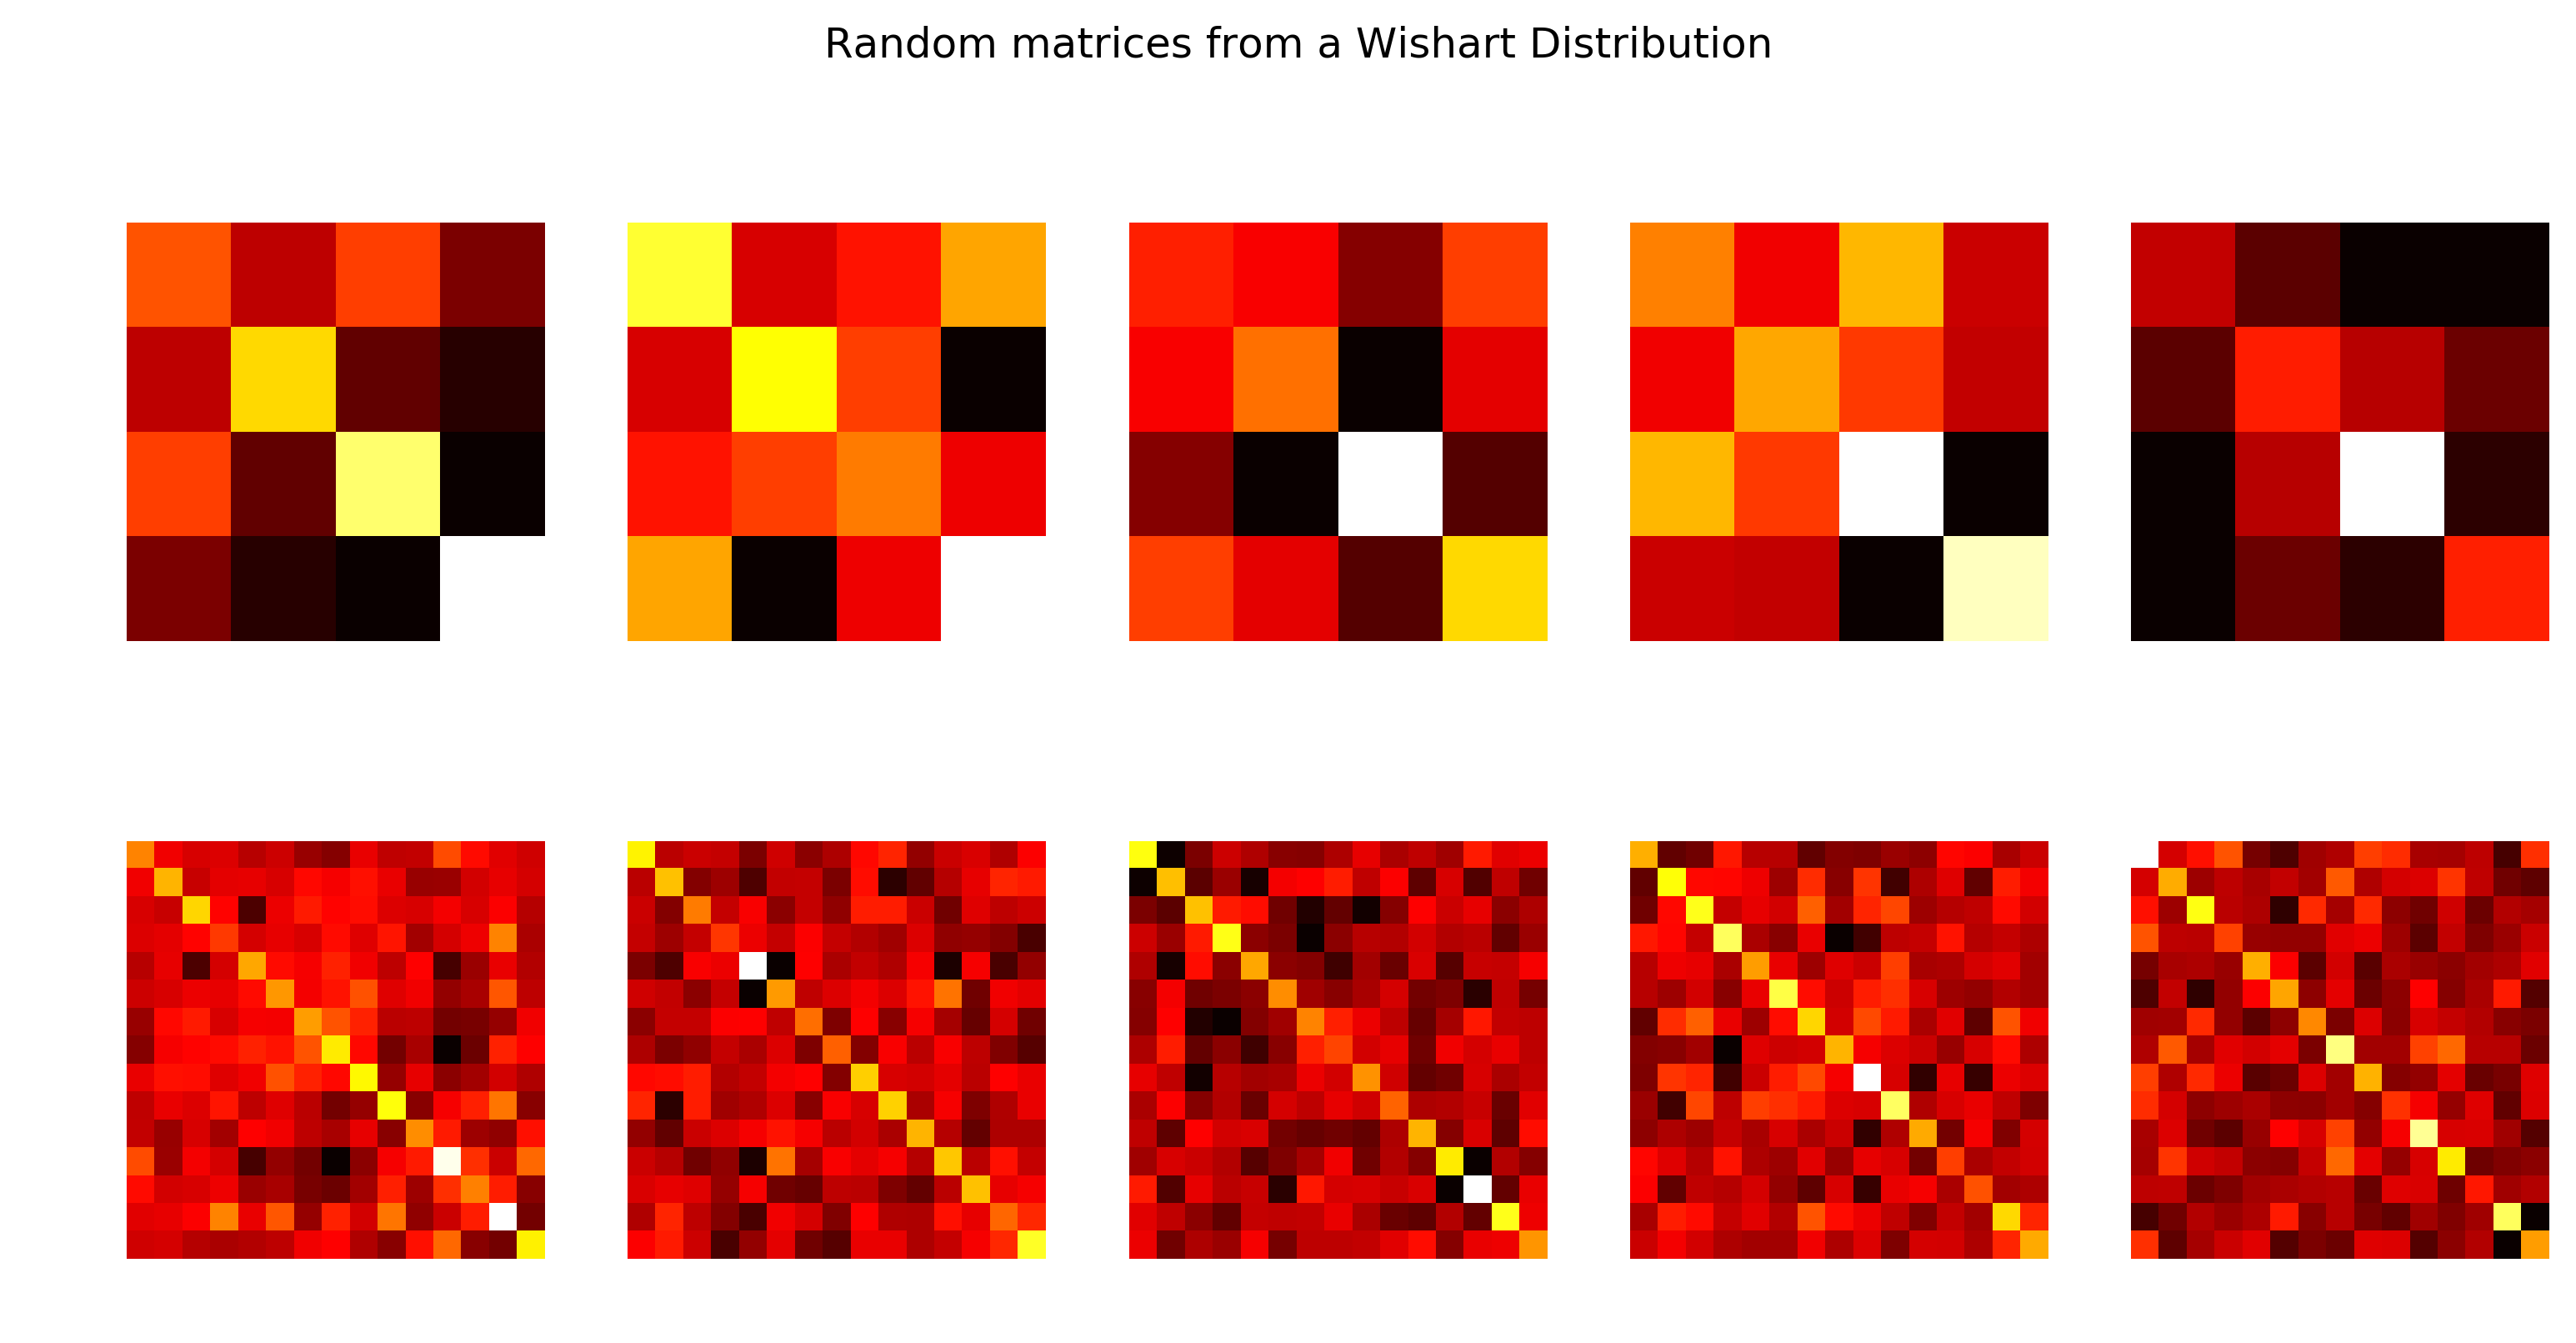

In [5]:
n = 4
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    if i >= 5:
        n = 15
    plt.imshow(stats.wishart.rvs(n+1, np.eye(n)), interpolation="none", cmap="hot")
    ax.axis("off")
    
plt.suptitle("Random matrices from a Wishart Distribution");

#### The Beta distribution

$X \sim \text{Beta }(\alpha, \beta)$ if its density function is:

$$ f_X(x | \alpha, \beta) = \frac{x^{\alpha -1}(1-x)^{\beta - 1}}{B(\alpha, \beta)} $$

where $B$ is the Beta function. The random variable $X$ is only allowed in [0, 1], making the Beta distribution a popular distribution for decimal values, probabilities and proportions.

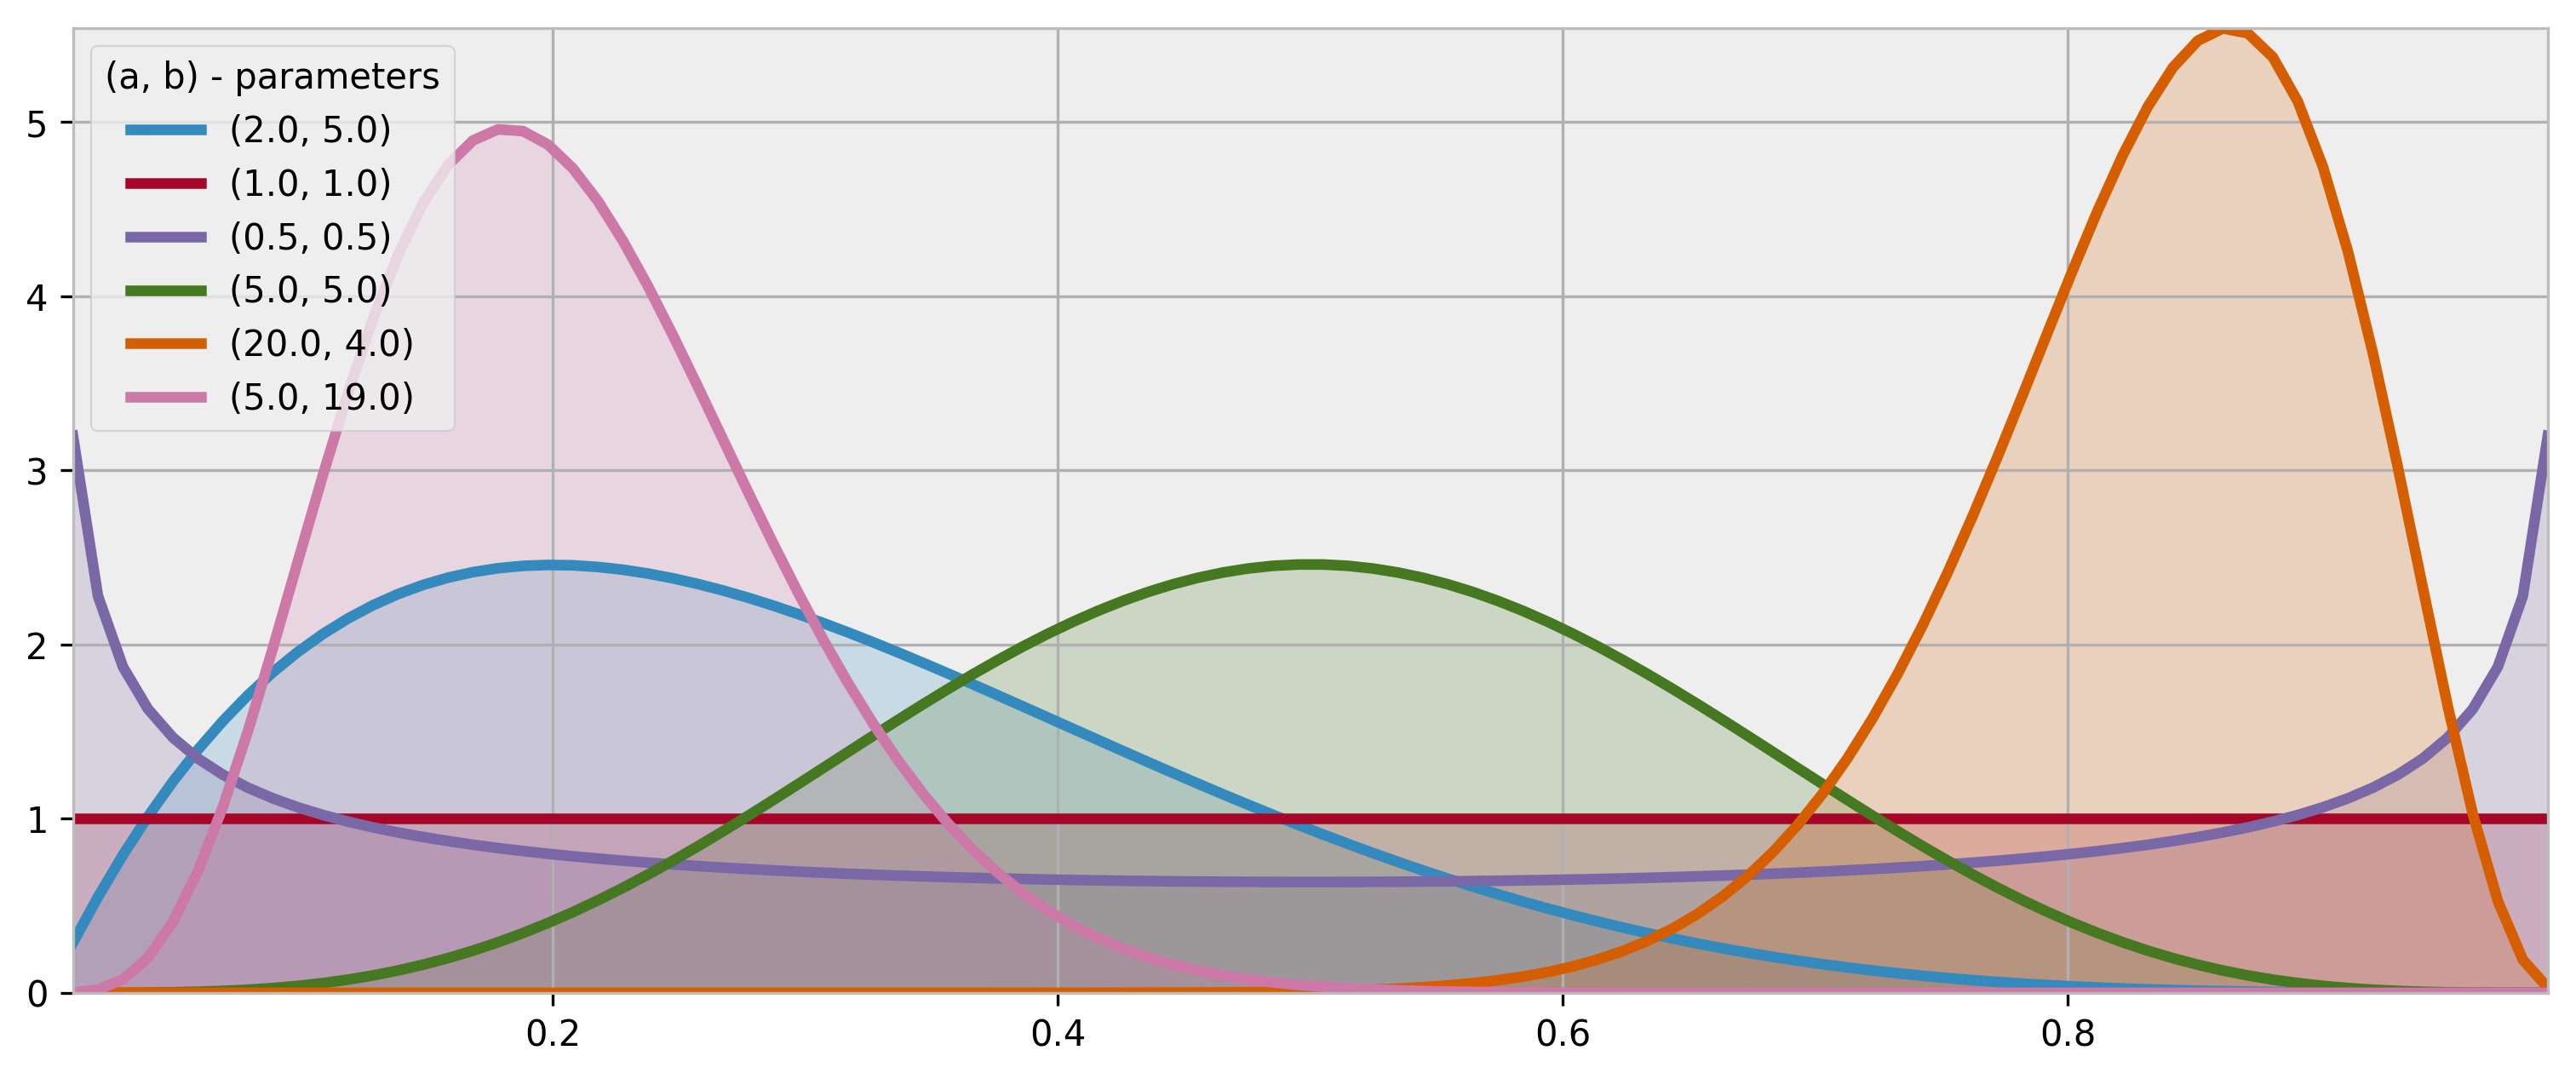

In [6]:
figsize(12.5, 5)

params = [(2, 5), (1, 1), (0.5, 0.5), (5, 5), (20, 4), (5, 19)]

x = np.linspace(0.01, 0.99, 100)
beta = stats.beta

for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f, %.1f)"%(a,b), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc="upper left", title="(a, b) - parameters");

Beta distribution is a generalization of the Uniform distribution (Beta(1,1))

Connection between the Beta distribution and the Binomial distribution.
If we assign a $\text{Beta }(\alpha, \beta)$ priors to $p$, we observe some data generated by a Binomial process, say $X \sim \text{Binomial }(N, p)$, with $p$ still unknownn. THen our posterior *is again a Beta distribution*, i.e. $p|X \sim \text{Beta }(\alpha + X, \beta + N - X)$

#### Example: Bayesian Multi-Armed Bandits

> Suppose you are faced with $N$ slot machines. Each bandit has an unknown probability of distributing a prize (colorfully called multi-armed bandits). Some bandits are very generous, others are not so much. Of course, you don't know what these probabilities are. By only choosing one bandit per round, our task is devise a strategy to maximize our winnings.

The task is complicated by 2 points:

* The stochastic nature of the bandits
* If we have a bandit that returns pretty good results, do we keep drawing from it to maintain our pretty good score, or do we try other bandits in hopes of finding an even-better bandit? This is the exploration vs exploitation dilemma

##### Applications

* Internet display advertising: companies have a suite of potential ads they can display to visitors, but the company is not sure which ad strategy to follow maximize sales.
* Ecology: animals have a finite amount of energy to expend, and following certain behaviors has uncertain rewards. How does the animal maximize its fitness?
* Finance: which stock option gives the highest return, under time-varying return profiles
* Clinical trials: a researcher would like to find the best treatment, out of many possible treatment, while minimizing losses.
* Psychology: how does punishment and reward affect our behaviour? How do humans learn?

*Optimal solution* is incredibly difficult. Many approximate-optimal solutions are quite good. Bayesian Bandits is good and scale incredibly well.

##### A Proposed Solution

The Bayesian solution begins by assuming priors on the probability of winning for each bandit (Flat prior over 0 to 1 == complete ignorance of these probabilities). The algorithm proceeds as follows:

For each round:

1. Sample a random variable $X_b$ from the prior of bandit $b$, for all b.
2. Select the bandit with largest sample, i.e select $B = \text{argmax } X_b$.
3. Observe the result of pulling bandit $B$, and update your prior on bandit $B$.
4. Return to 1.

We should not discard losers, but we should pick them at a decreasing rate as we gather confidence that there exist *better* bandits.

In [7]:
class Bandits(object):
    """
    This class represents N bandits machines.
    
    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1
        
    methods:
        pull (i): return the results, 0 or 1, of pulling the ith bandit
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)
        
    def pull(self, i):
        #i is which arm to pull
        return np.random.rand() < self.p[i]
    
    def __len__(self):
        return len(self.p)
    
class BayesianStrategy(object):
    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.

    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    def __init__(self, bandits):
        self.bandits = bandits
        n_bandits = len(self.bandits)
        self.wins = np.zeros(n_bandits)
        self.trials = np.zeros(n_bandits)
        self.N = 0
        self.choices = []
        self.bb_score = []
        
    def sample(self, n = 1):
        bb_score = np.zeros(n)
        choices = np.zeros(n)
        
        for k in range(n):
            #sample from the bandits's priors, and select the largest sample
            choice = np.argmax(np.random.beta(1 + self.wins, 1 + self.trials - self.wins))
            
            # sample the chosen bandit
            result = self.bandits.pull(choice)
            
            # Update priors and score
            self.wins[choice] += result
            self.trials[choice] += 1
            bb_score[k] = result
            self.N += 1
            choices[k] = choice
            
        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return

We visualize the learning of the Bayesian bandit solution.

In [8]:
figsize(11.0, 10)

beta = stats.beta
x = np.linspace(0.001, .999, 200)

def plot_priors(bayesian_strategy, prob, lw=3, alpha = 0.2, plt_vlines = True):
    wins = bayesian_strategy.wins
    trials = bayesian_strategy.trials
    for i in range(prob.shape[0]):
        y = beta(1 + wins[i], 1 + trials[i] - wins[i])
        p = plt.plot(x, y.pdf(x), lw = lw)
        c = p[0].get_markeredgecolor()
        plt.fill_between(x, y.pdf(x), 0, color = c, alpha = alpha, 
                         label="Underlying probability: %.2f" % prob[i])
        if plt_vlines:
            plt.vlines(prob[i], 0, y.pdf(prob[i]), 
                       colors = c, linestyles = "--", lw = 2)
        plt.title("Posteriors After %d pull" % bayesian_strategy.N + "s"*(bayesian_strategy.N > 1))
        plt.autoscale(tight=True)

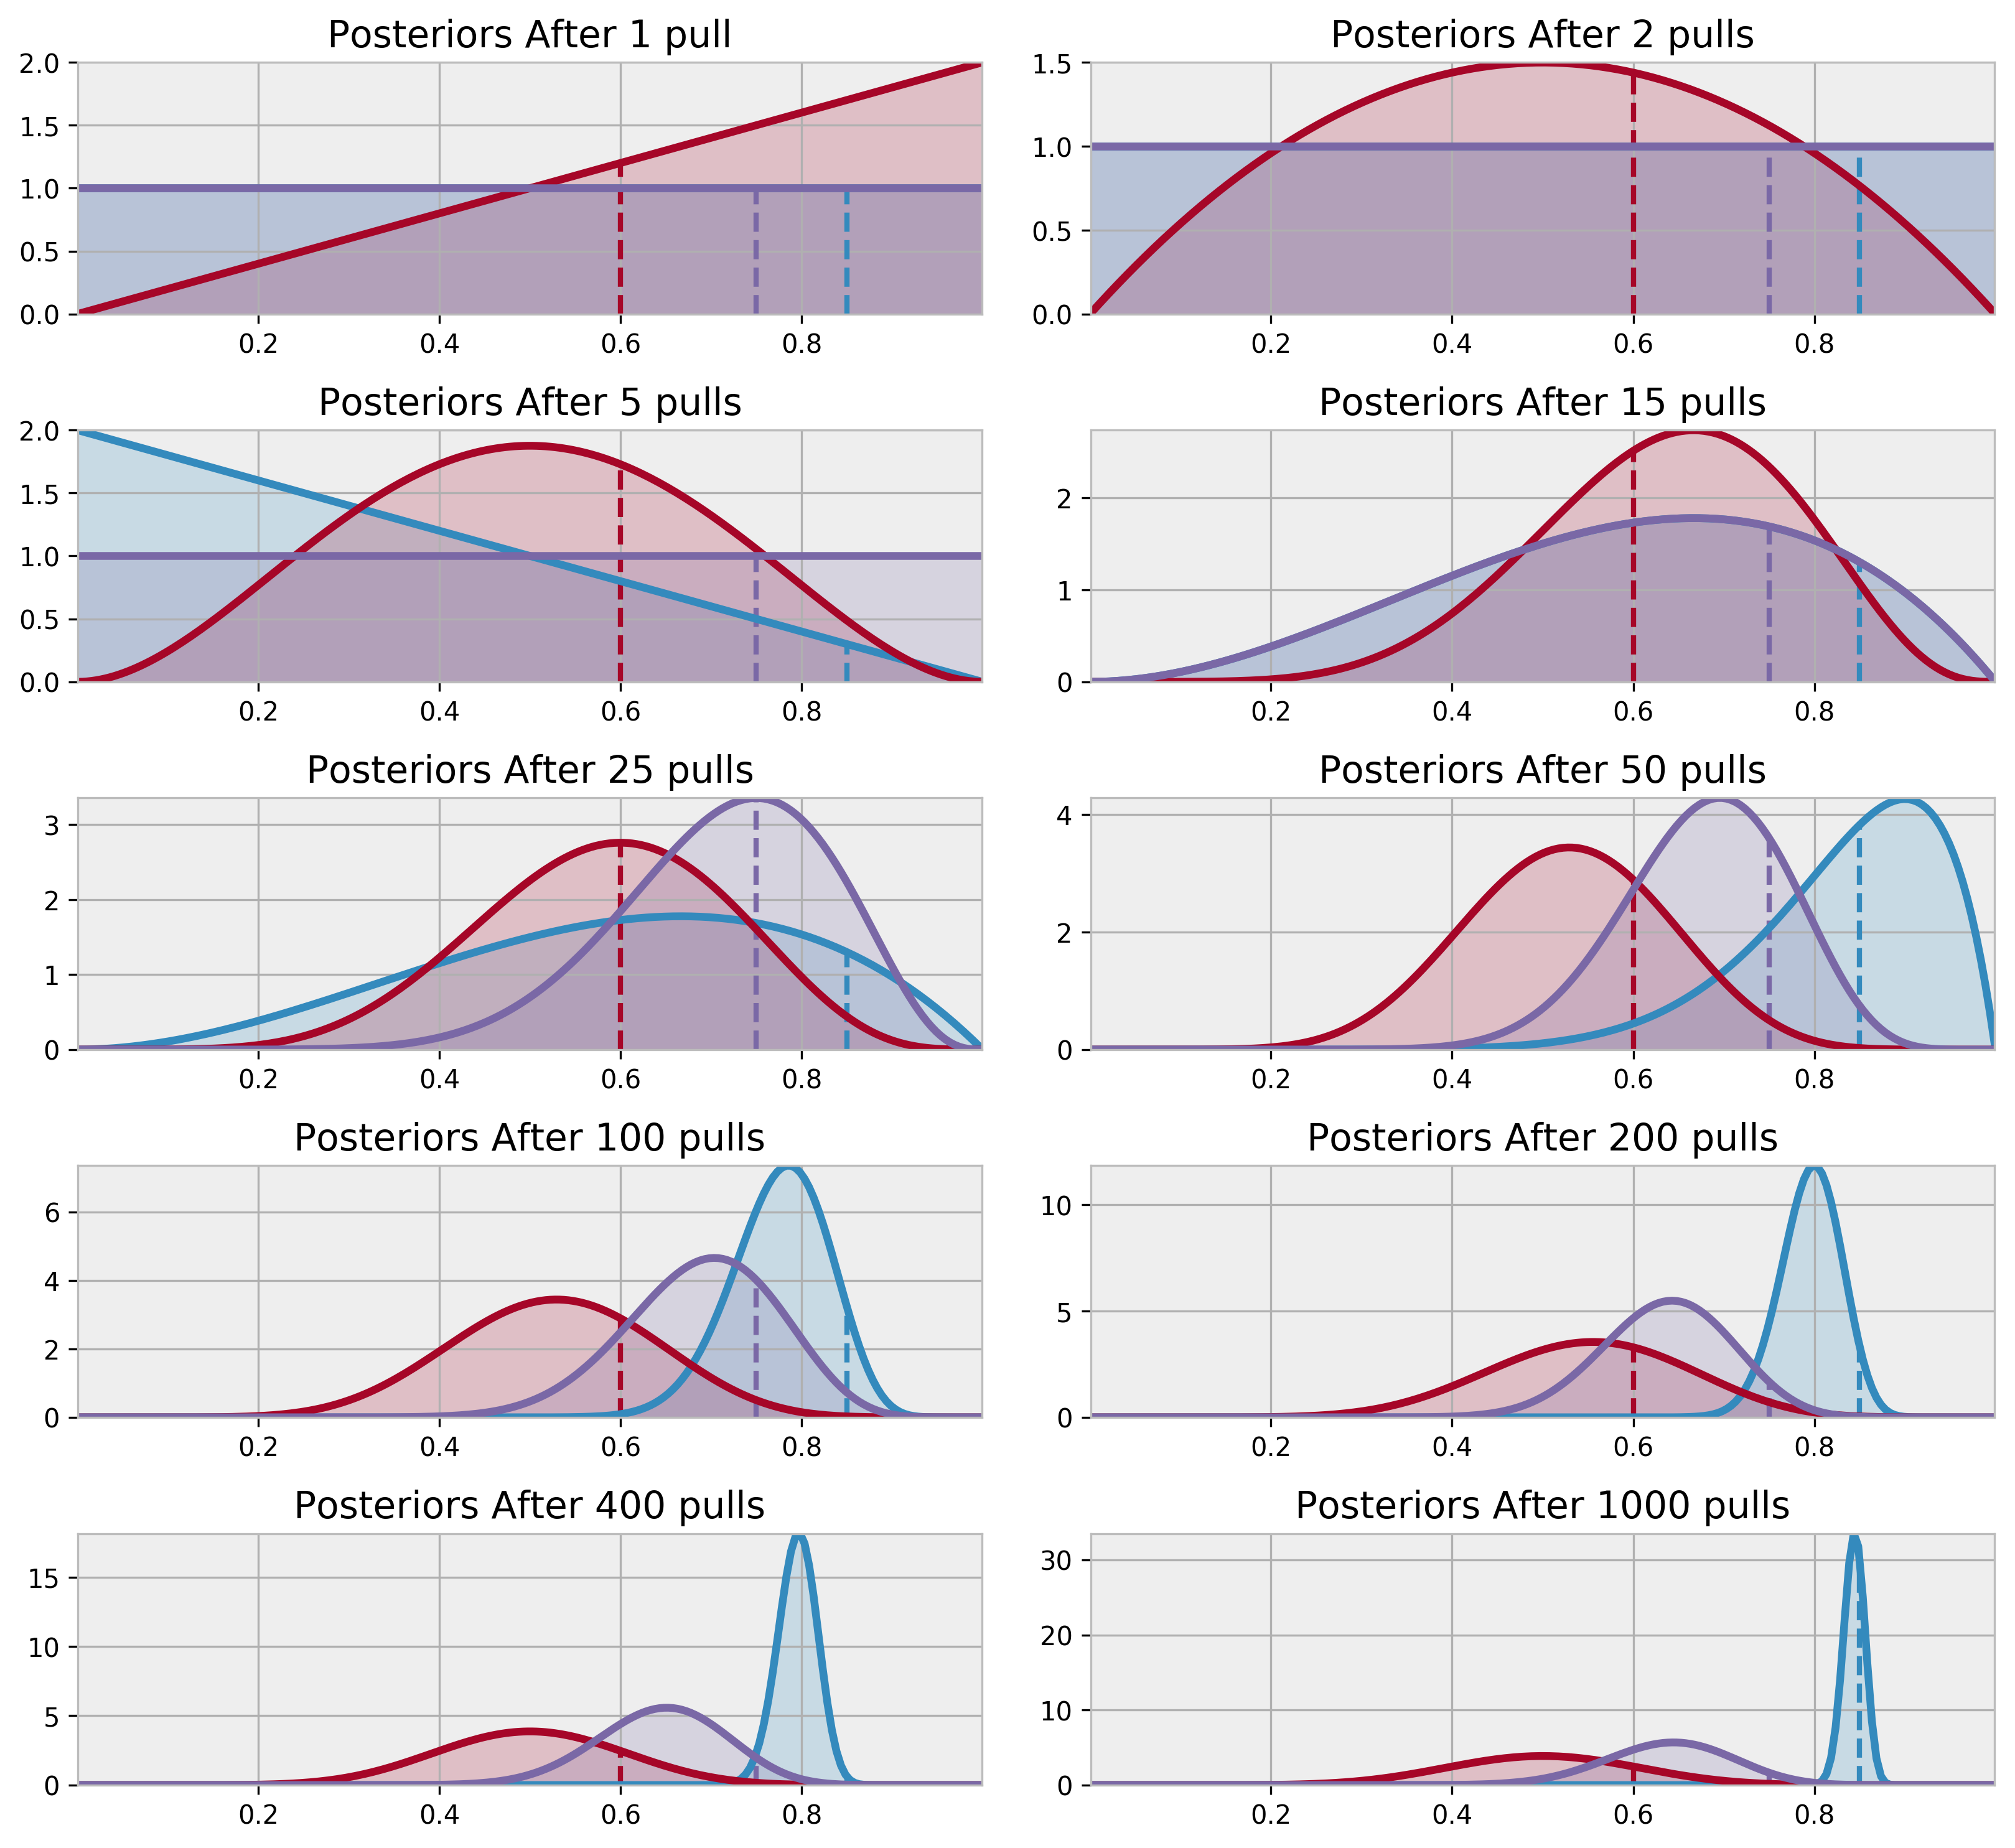

In [9]:
hidden_prob = np.array([0.85, 0.60, 0.75])
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

draw_samples = [1, 1, 3, 10, 10, 25, 50, 100, 200, 600]

for j, i in enumerate(draw_samples):
    plt.subplot(5, 2, j + 1)
    bayesian_strat.sample(i)
    plot_priors(bayesian_strat, hidden_prob)
    plt.autoscale(tight=True)
plt.tight_layout();

### A measure of Good

We need a metric to calculate **how well we are doing**. Recall the absolute *best* we can do is to always pick the bandit with the largest probability of winning. Our score should be relative to how well we should have done had we chosen the best bandit from the beginning. This motivates the *total regret* of a strategy.

$$
\begin{align}
R_T &= \sum_{i=1}^T (w_opt - w_{B(i)})  \\
    &= Tw^* - \sum_{i = 1}^T w_{B(i)}
\end{align}
$$

where $w_{B(i)}$ is the probability of a prize of the chosen bandit in the $i$ round.

We plot the total regret of this simulation, including the scores of some other strategies:

1. Random: randomly choose a bandit to pull. if you can't beat this, just stop.
2. Largest Bayesian credible bound: pick the bandit with the largest upper bound in its 95% credible region of the underlying probability.
3. Bayes-UCB algorithm: pick the bandit with the largest *score*, where score is a dynamic quantile of the posterior.
4. Mean of posterior: choose the bandit with the largest posterior mean. This is what a human player would likely do.
5. Largest proportion: pick the bandit with the current largest observed proportion of winning.

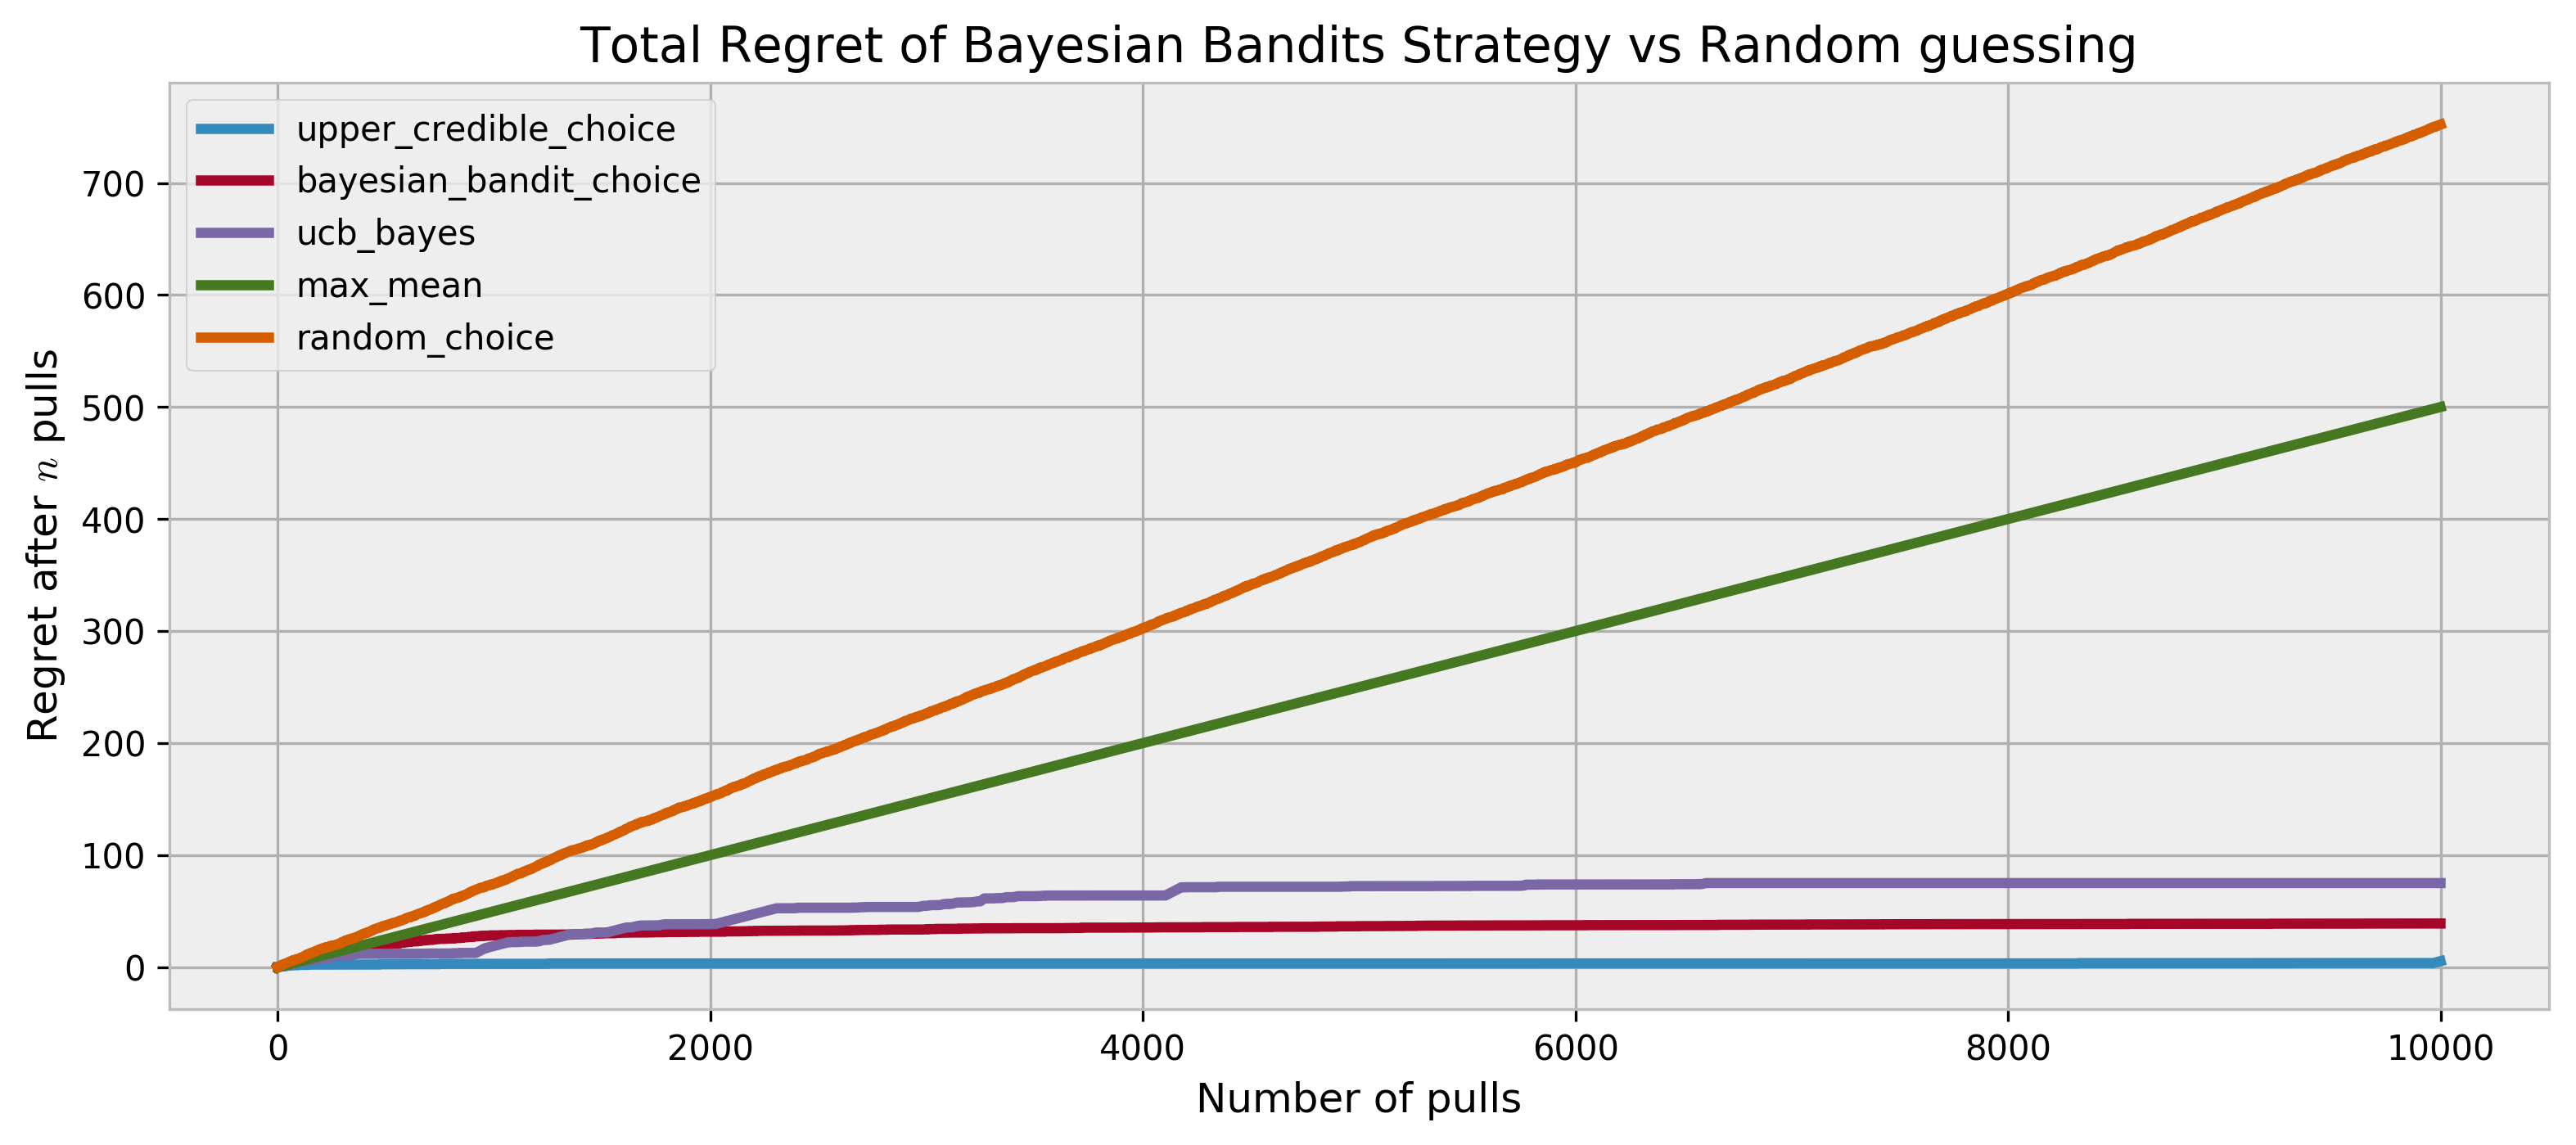

In [14]:
figsize(12.5, 5)
from other_strats import *

#define a harder problem
hidden_prob = np.array([0.15, 0.2, 0.1, 0.05])
bandits = Bandits(hidden_prob)

#define regret
def regret(probabilities, choices):
    w_opt = probabilities.max()
    return (w_opt - probabilities[choices.astype(int)]).cumsum()

#Create new strategies
strategies = [upper_credible_choice,
              bayesian_bandit_choice,
              ucb_bayes,
              max_mean,
              random_choice]
algos = []
for strat in strategies:
    algos.append(GeneralBanditStrat(bandits, strat))
    
# train 10000 times
for strat in algos:
    strat.sample_bandits(10000)
    
for i, strat in enumerate(algos):
    _regret = regret(hidden_prob, strat.choices)
    plt.plot(_regret, label=strategies[i].__name__, lw=3)
    
plt.title("Total Regret of Bayesian Bandits Strategy vs Random guessing")
plt.xlabel("Number of pulls")
plt.ylabel("Regret after $n$ pulls")
plt.legend(loc = "upper left");

Bayesian bandits and other strategies have decreasing rates of regret, representing we are achieving optimal choices. To remove any possible luck in the above simulation, we should instead look at the *expected total regret*.

$$\bar{R}_t = E[R_t]$$

In can be shown that any *sub-optimal* strategy's expected total regret is bounded below logarithmically

$$E[R_T] = \Omega(log(T))$$

Thus, any strategy that matches logarithmic-growing regret is said to "solve" the Multi-Armed Bandit problem. We can approximate Bayesian Bandit's expected total regret by performing the same experiment many times.

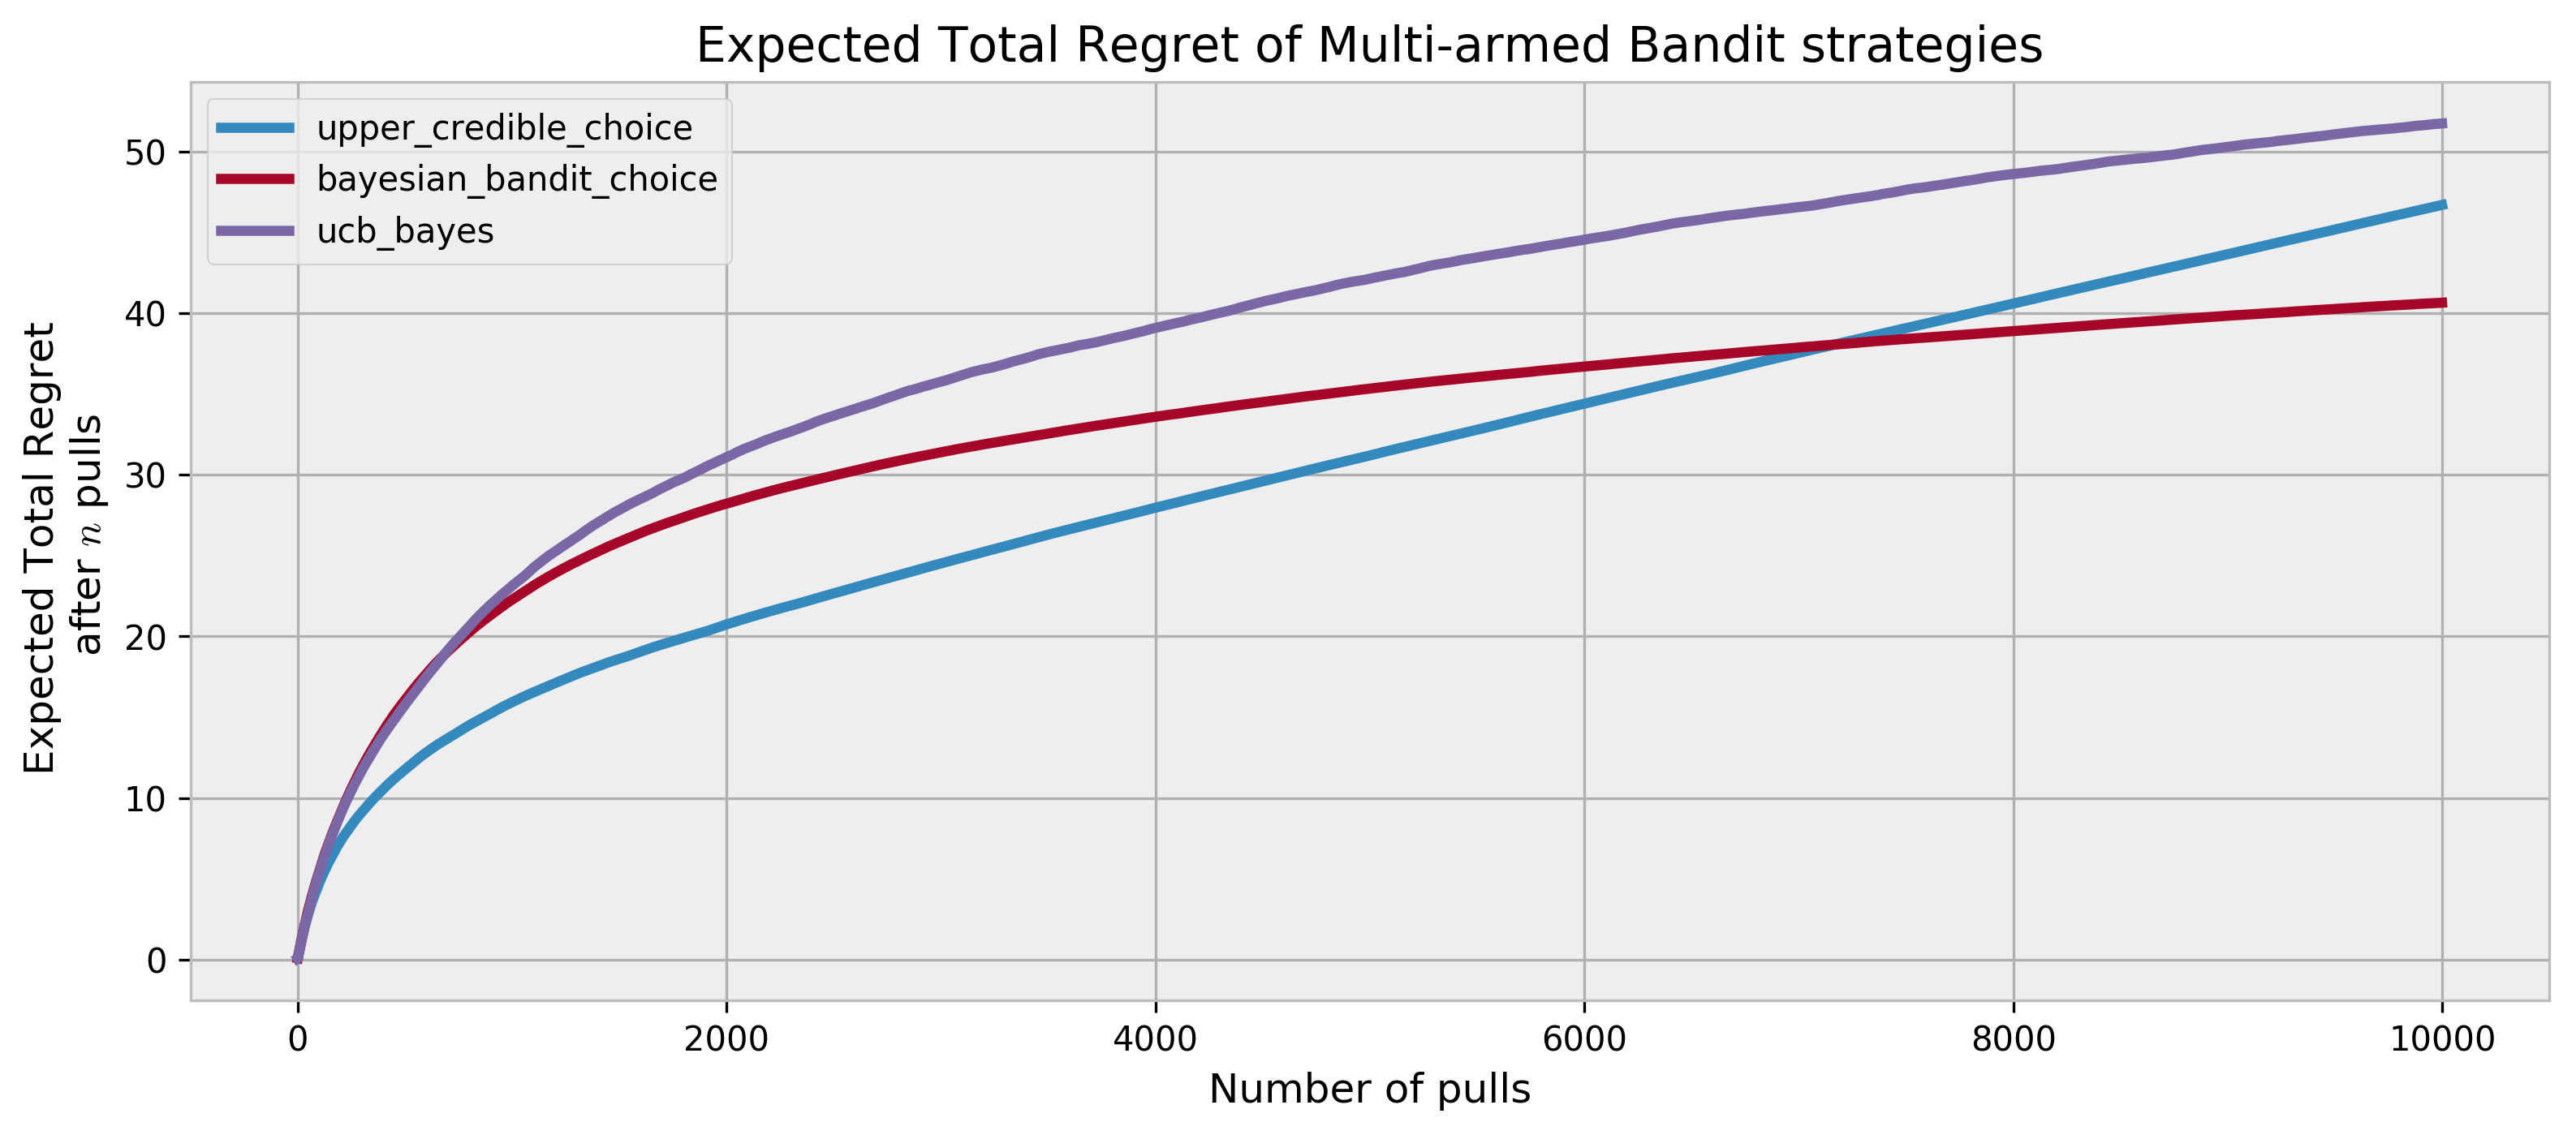

In [11]:
trials = 500
expected_total_regret = np.zeros((10000, 3))

for i_strat, strat in enumerate(strategies[:-2]):
    for i in range(trials):
        general_strat = GeneralBanditStrat(bandits, strat)
        general_strat.sample_bandits(10000)
        _regret = regret(hidden_prob, general_strat.choices)
        expected_total_regret[:,i_strat] += _regret
    plt.plot(expected_total_regret[:,i_strat]/trials, lw=3, label=strat.__name__)

plt.title("Expected Total Regret of Multi-armed Bandit strategies")
plt.xlabel("Number of pulls")
plt.ylabel("Expected Total Regret \n after $n$ pulls")
plt.legend(loc="upper left");

### Extending the algorithm

Some possiblities of extension

* If interested in the minimum probability, simly choose $B= \text{argmin }X_b$ and proceed.
* Adding learning rates: Suppose the underlying environment may change over time. Technically the standard Bayesian bandit algorithm would self-update itself by noting that what it though was the best is tarting to fail more often. We can motivate the algorithm to learn changing environments quicker by simply adding a *rate* term upon updating.

```
self.wins[choice] = rate * self.wins[choice] + result
self.trials[choice] = rate * self.trials[choice] + 1
```

if `rate < 1`, the algorithm will forget its previous wins quicker and there will be a downward pressure towards ignorance.

* Hierarchical algorithms
* Extending the rewards, denoted $y_a$ for bandit $a$, to random variables from a distribution $f_{y_a}(y)$ is straightforward. This problem can be rephrased as "Find the bandit with the largest expected value", as playing the bandit with the largest expected value is optimal.
* Application of Bayesian Bandit algorithm to commenting systems.

Bandit with 15 different options

[ 0.13323197  0.04793079  0.11861655  0.00142829  0.00033491  0.07891614
  0.01079503  0.08948362  0.10783864  0.02687528  0.02514901  0.05988956
  0.07183907  0.00232426  0.04509798  0.0237531   0.03810491  0.02158674
  0.07520844  0.01807183  0.00457957  0.00978392  0.04626753  0.13338356
  0.02502558  0.07402116  0.01037347  0.01019457  0.03797432  0.04573319
  0.0004457   0.12235936  0.12537292  0.03378344  0.01120562]


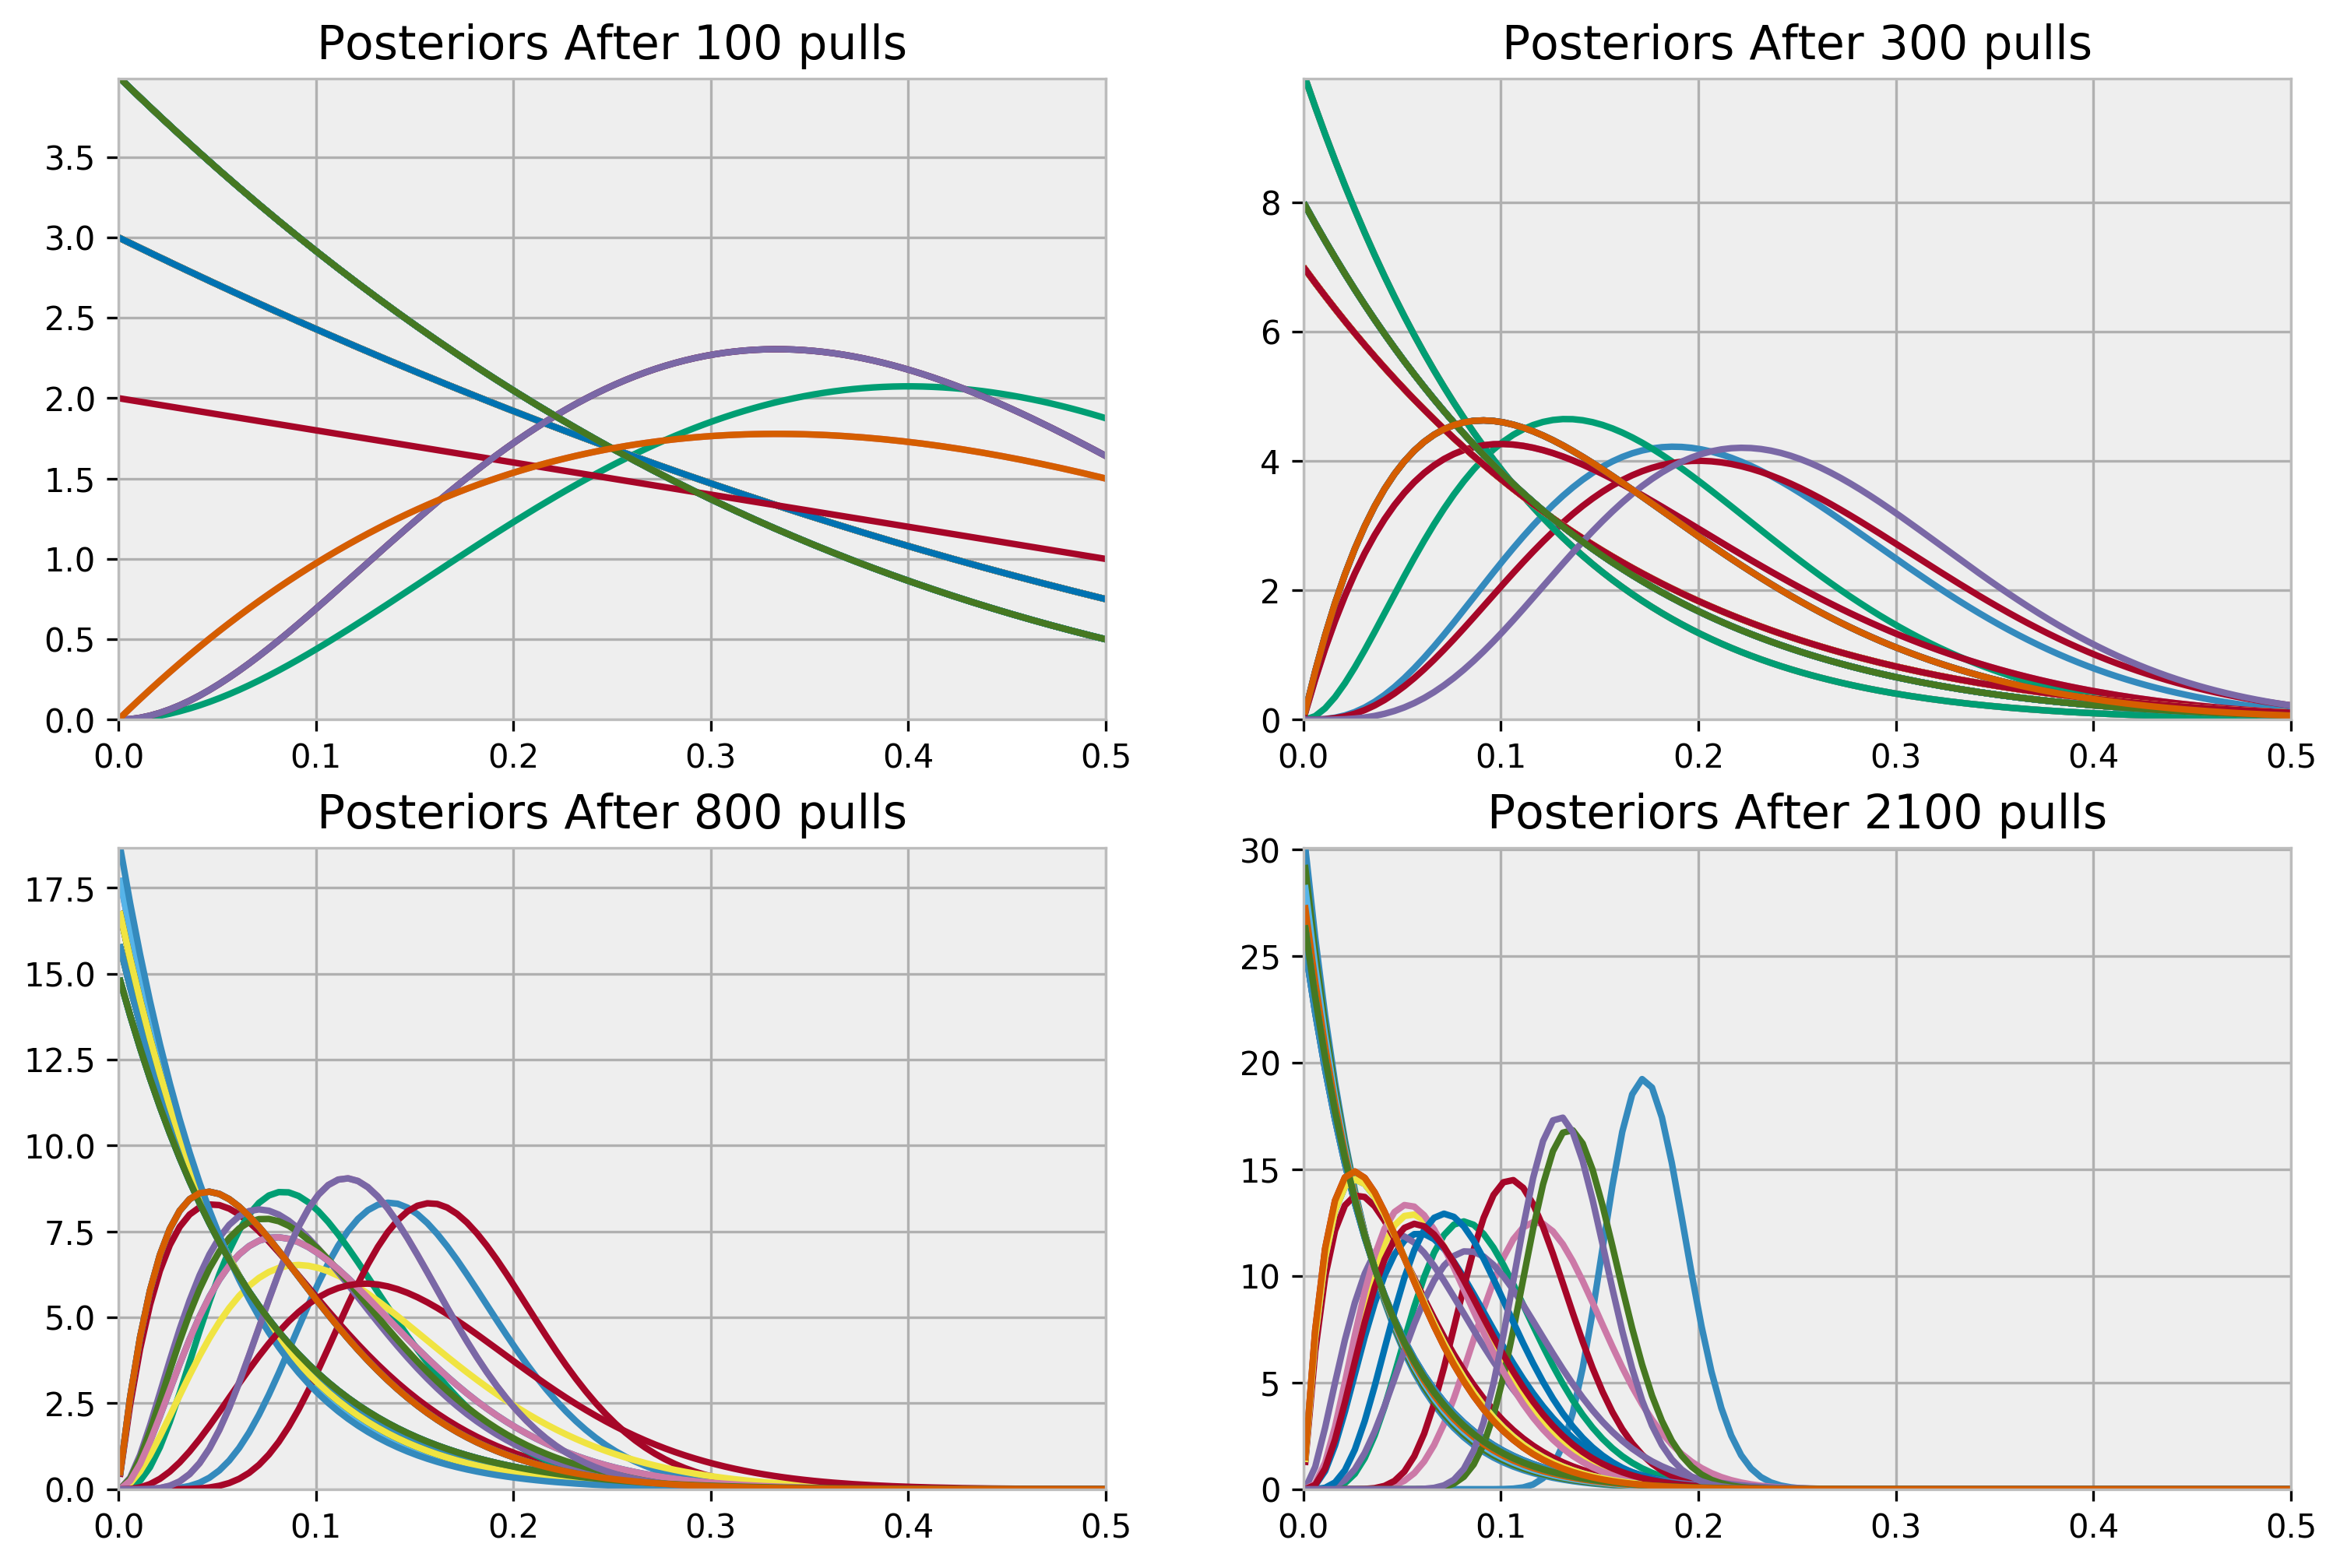

In [16]:
figsize(12.0, 8.0)
beta = stats.beta
hidden_prob = beta.rvs(1, 13, size=35)
print(hidden_prob)

bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

for j, i in enumerate([100, 200, 500, 1300]):
    plt.subplot(2, 2, j+1)
    bayesian_strat.sample(i)
    plot_priors(bayesian_strat, hidden_prob, lw=2, alpha=0.0, plt_vlines=False)
    plt.xlim(0, 0.5)

### Exliciting expert prior

Specifying a subjective prior is how practitioners incorporate domain knowledge about the problem into our mathematical framework.

* Aids speeds of MCMC convergence.
* More accurate inference
* Express our uncertainty better.

Eliciting priors from non-technical experts is especially difficult. 

We can use **Trial roulette method** to build a prior distribution (Placing counters on what the expert thinks are possible outcomes)

##### Example: Stock Returns

When choosing which stocks to pick, an analyst will often look at the daily return of the stock. Suppose $S_t$ is the price of the stock on day $t$, then the daily return on day $t$ is:

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} $$

The *expected daily return* of a stock is denoted $\mu = E[r_t]$. Unfortunately, stock returns are so filled with noise that it is very hard to estimate this parameter. The parameter might change over time, hence it is unwise to use a large historical dataset.

The expected return has been estimated by using the sample mean. The sample mean of a small sized dataset has enormous portential to be very wrong. Thus Bayesian inference is the correct procedure here, since we are able to see our uncertainty along with probable values.

we will examining the daily return of the AAPL, GOOG, MSFT, and AMZN. Let's assume that we ask a stock fund manager 

> What do you think the return profile looks like for each of these companies?

Suppose we fit Normal distribution 

In [ ]:
figsize(11., 5)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

normal = stats.norm
x = np.linspace(-0.15, 0.15, 100)

expert_prior_params = {"AAPL":(0.05, 0.03),
                 "GOOG":(-0.03, 0.04), 
                 "TSLA": (-0.02, 0.01), 
                 "AMZN": (0.03, 0.02), 
                 }

for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i+1)
    y = normal.pdf(x, params[0], scale = params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color = colors[i], linewidth=2,
                     edgecolor = colors[i], alpha = 0.6)
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k","--", linewidth = 0.5)
    plt.xlim(-0.15, 0.15)
plt.tight_layout()

We should investigate the *covariance matrix* of the returns. It would be unwise to invest in two stocks that are highly correlated

### Jefferys Priors

The flat prior is not transformation invariant. Suppose we have a random variable $X$ from Bernoulli($\theta$). We define the prior on $p(\theta) = 1$.

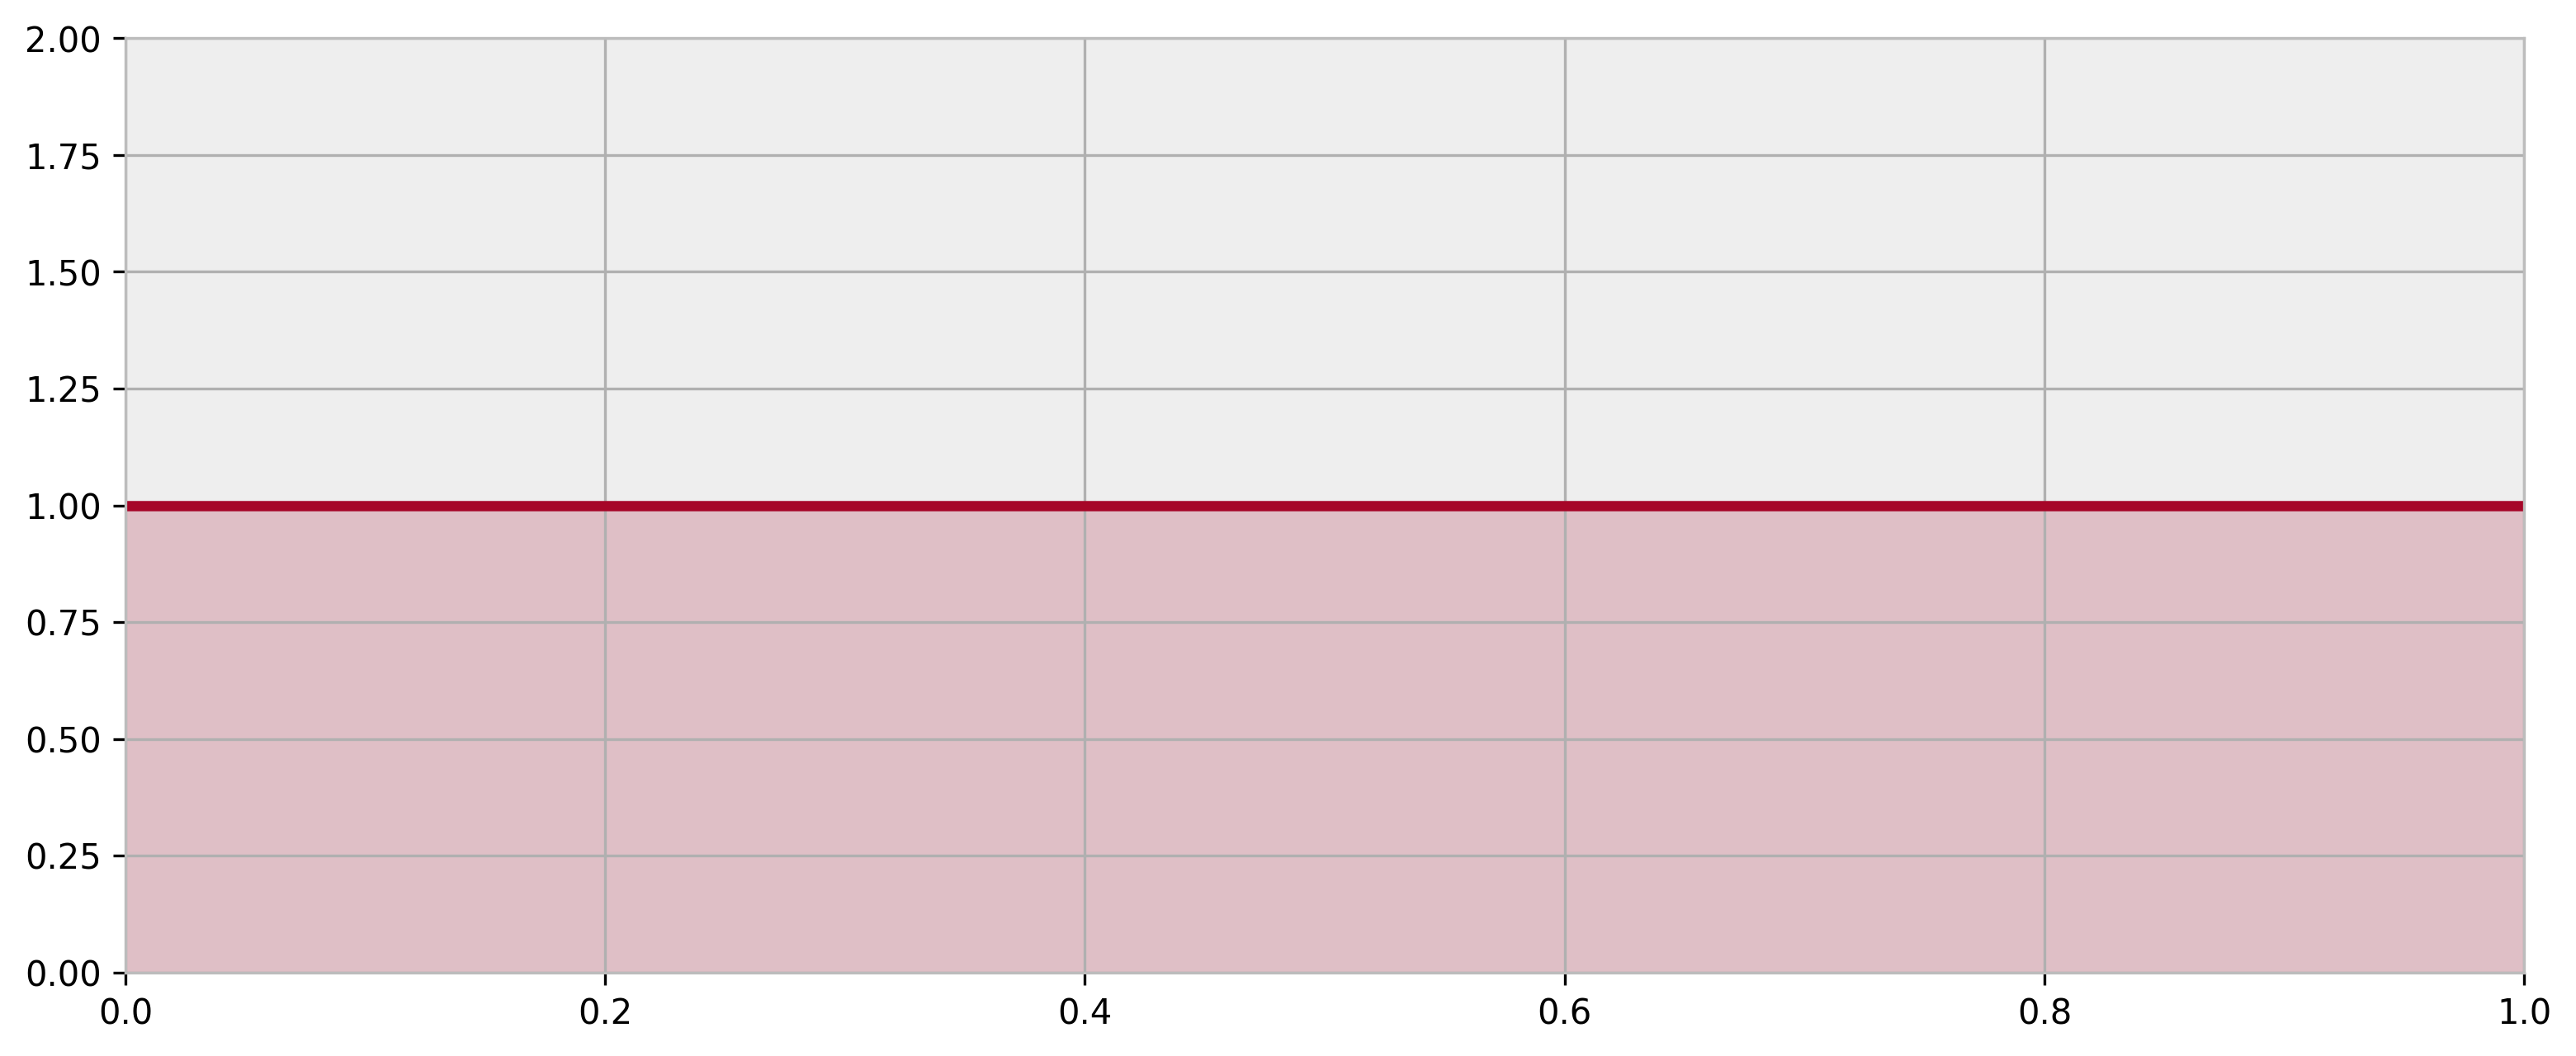

In [20]:
figsize(12.5, 5)

x = np.linspace(0, 1, 150)
y = np.linspace(1, 1, 150)
lines = plt.plot(x, y, color="#A60628", lw=3)
plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
plt.autoscale(tight=True)
plt.ylim(0, 2);

Let's transform $\theta$ with the function $\psi = log \frac{\theta}{1 - \theta}$. This is just a function to stretch $\theta$ across the real line. Now how likely are different values of $\psi$ under our transformation.

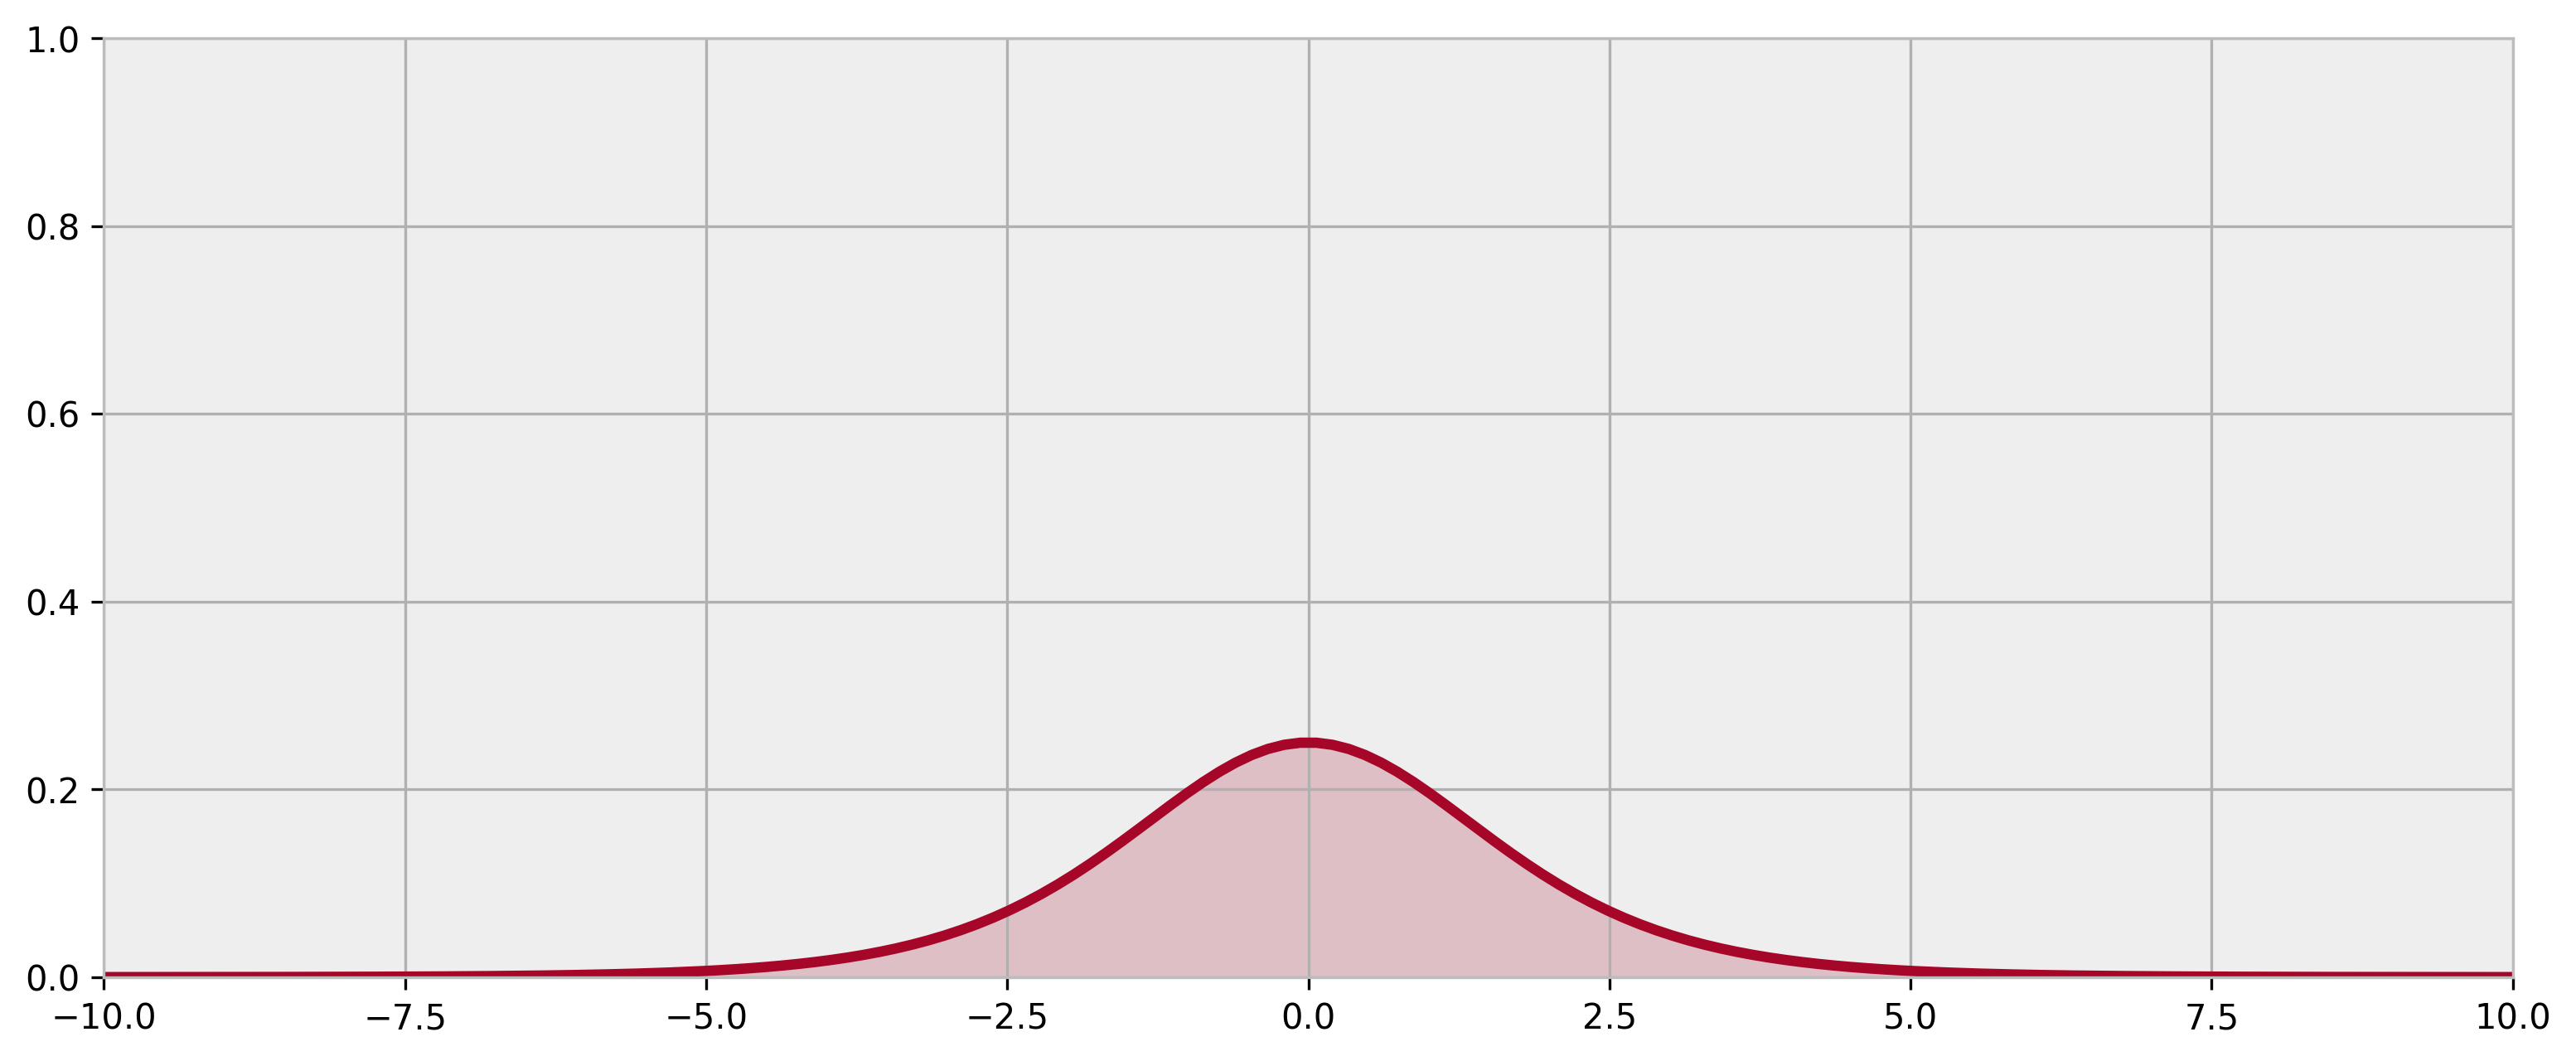

In [23]:
figsize(12.5, 5)

psi = np.linspace(-10, 10, 150)
y = np.exp(psi)/(1 + np.exp(psi))**2
lines = plt.plot(psi, y, color="#A60628", lw=3)
plt.fill_between(psi, 0, y, alpha = 0.2, color = lines[0].get_color())
plt.autoscale(tight=True)
plt.ylim(0, 1);

The point of Jeffreys Priors is to create priors that don't accidentally become informative when you transform the variables you placed them originally on

Jeffreys Priors are defined as:

$$
p_J(\theta) \propto I(\theta)^\frac{1}{2}
$$

$$
I(\theta) = -E \bigg[ \frac{d^2 log p(X|\theta)}{d\theta^2} \bigg]
$$

$I$ being the Fisher Information

### Effect of the prior as $\textrm{N}$ increases

The posterior distribution for a parameter $\theta$, given a data set $\textrm{X}$ can be written as

$$
p(\theta | {\textbf X}) \propto \underbrace{p({\textbf X} | \theta)}_{{\textrm likelihood}}  \cdot  \overbrace{ p(\theta) }^{ {\textrm prior} }
$$

or as is more commonly displayed on the log scale

$$ log(p(\theta | \textrm{X})) = c + L(\theta; \textrm{X}) + log(p(\theta)) $$

The log-likelihood $L(\theta, \textrm{X}) = log(p(\textrm{} | \theta)$, **scales with sample size**, since it is a function of the data, while the prior density does not. Therefore, as the sample size increases, the absolute value of $L(\theta ; X)$ is getting larger while $log(p(\theta))$ stays fixed (for a fixed value of $\theta$), thus the sum $L(\theta; X) + log(p(\theta))$ becomes more heavily influenced by $L(\theta; X)$ as the sample size increases.

As the sample size increases, the chosen prior has less influence. Hence inference converges regardless of chosen prior, so long as the areas of non-zero probabilities are the same.

We examine the convergence of two posteriors of a Binomial's parameter $\theta$, one with a flat prior and the other with a biased prior towards 0. As the sample size increases, the posteriors, and hence the inference, converge.

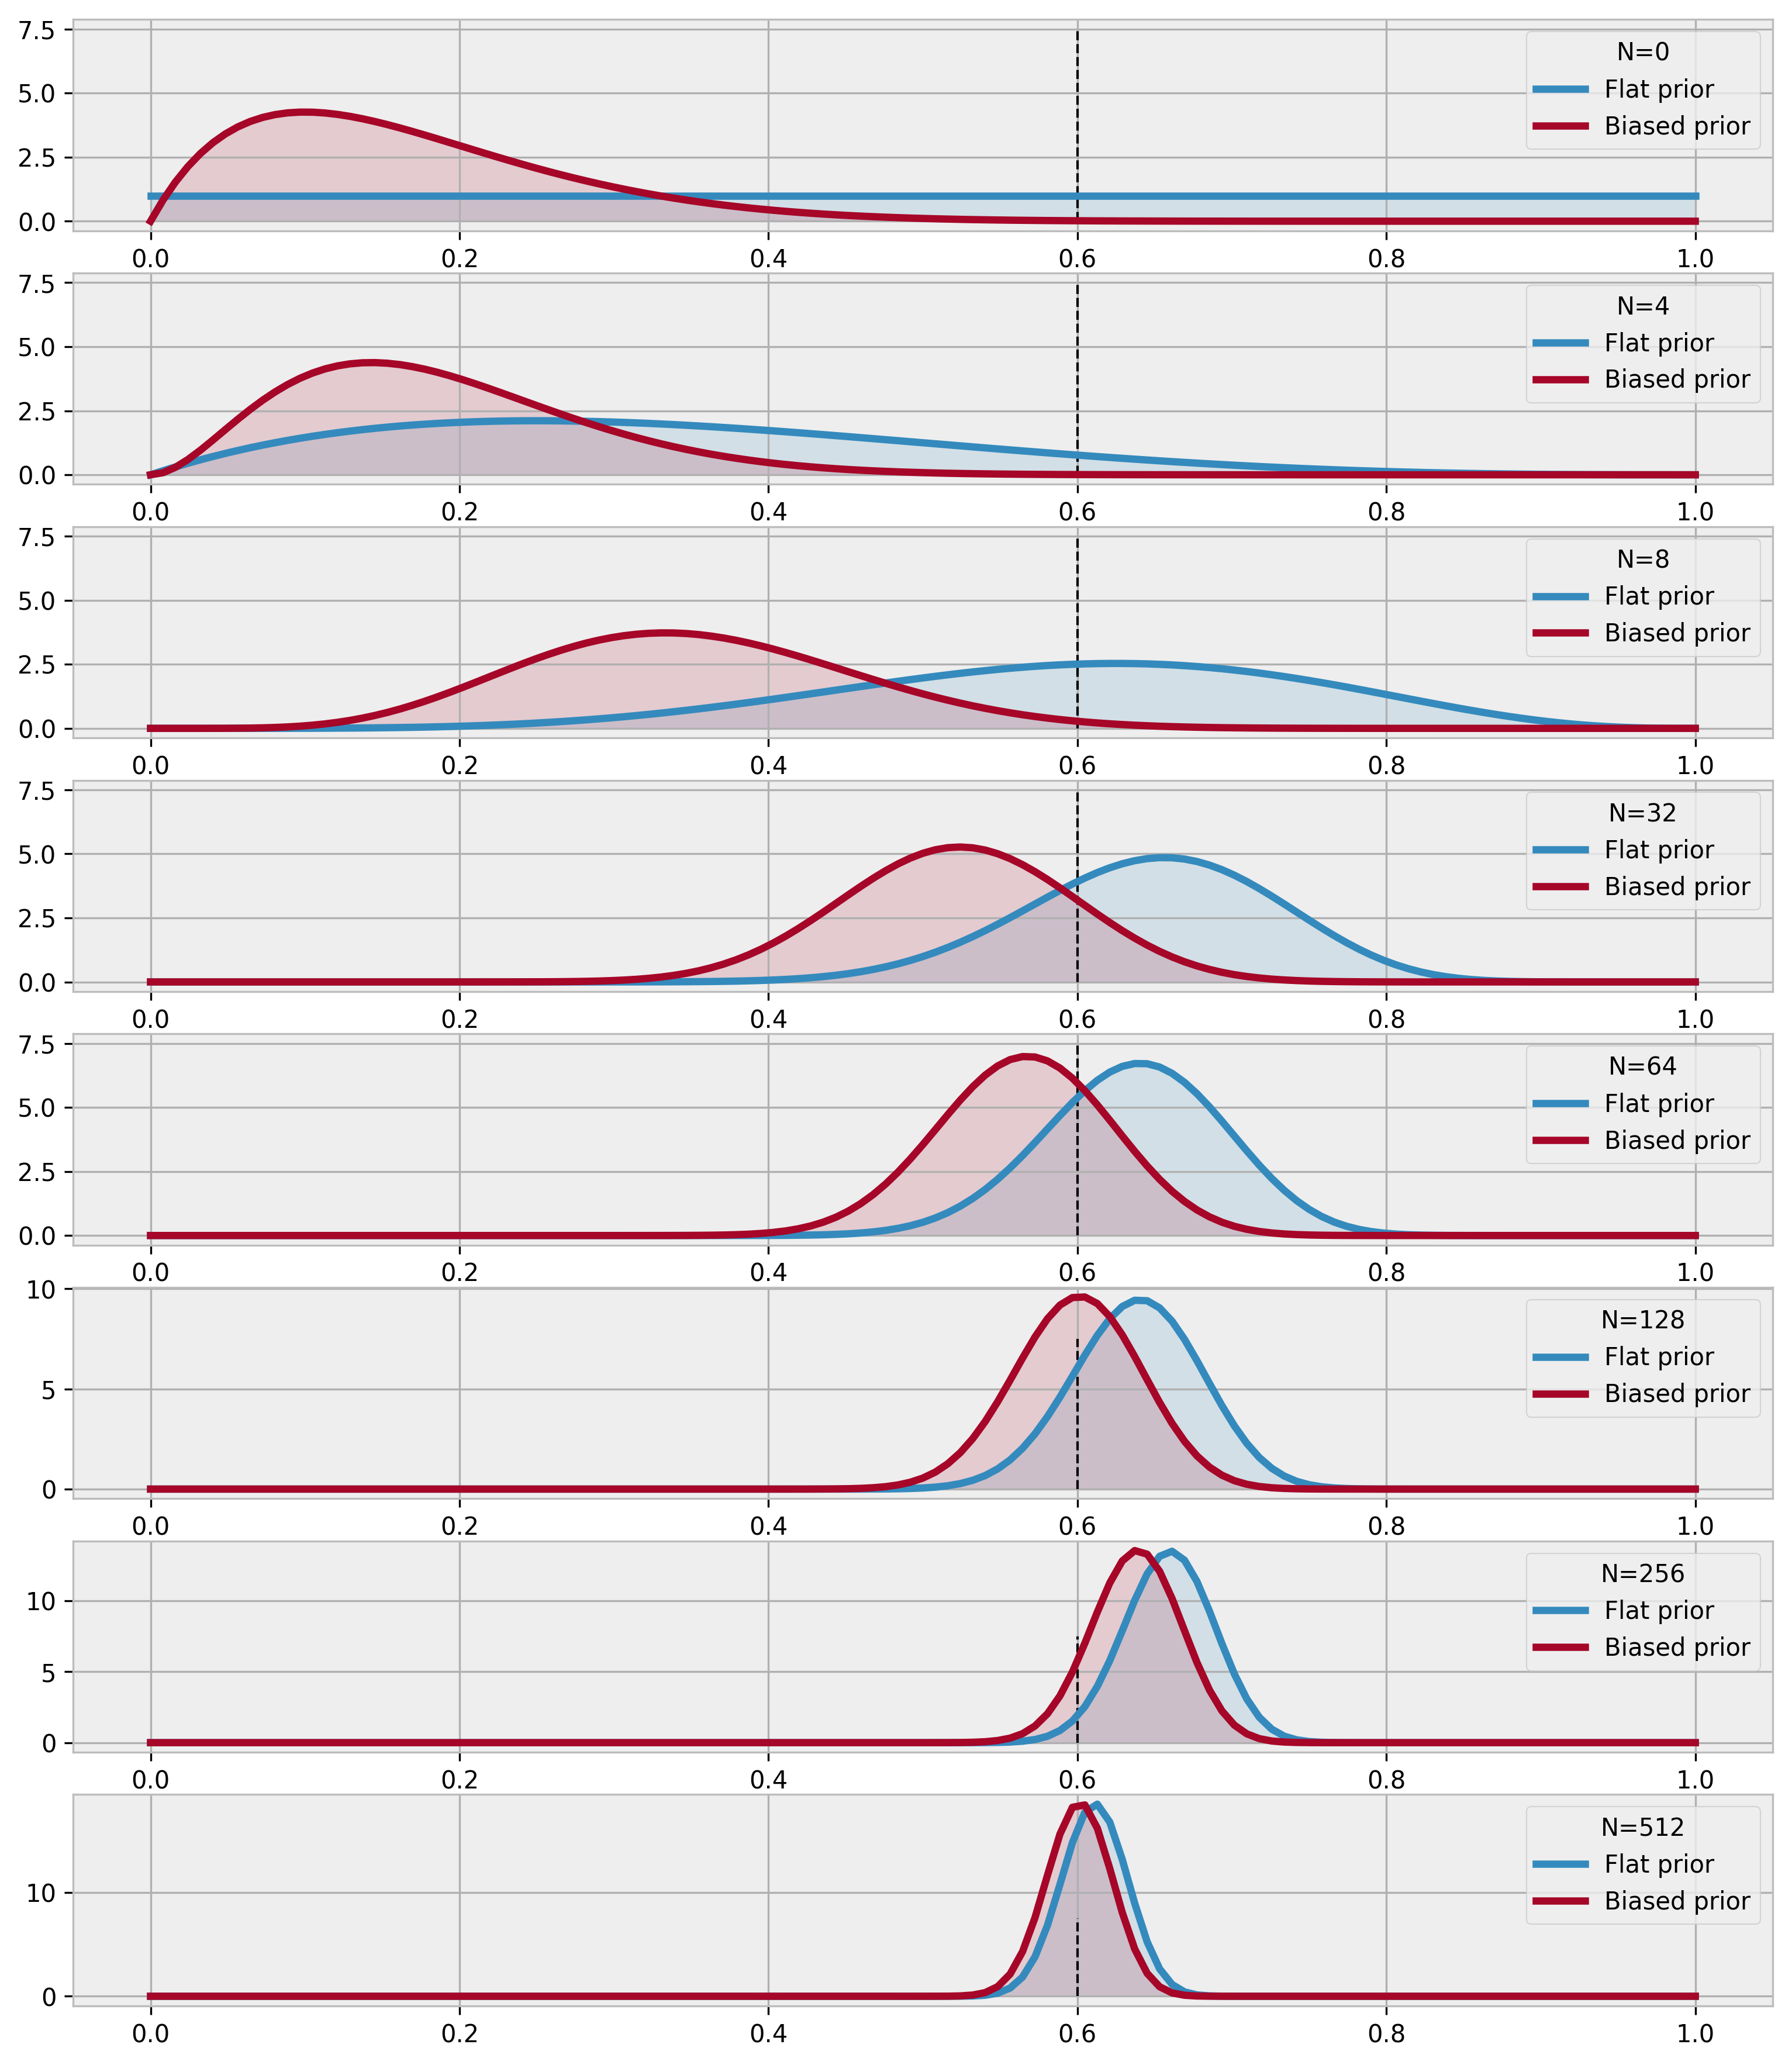

In [28]:
figsize(12.5, 15)

p = 0.6
beta1 = np.array([1, 1])
beta2 = np.array([2, 10])

x = np.linspace(0, 1, 125)

data = stats.bernoulli.rvs(p, size=500)

for i, N in enumerate([0, 4, 8, 32, 64, 128, 256, 512]):
    s = data[:N].sum()
    plt.subplot(8,1,i+1)
    params1 = beta1 + np.array([s, N-s])
    params2 = beta2 + np.array([s, N-s])
    y1, y2 = stats.beta.pdf(x, *params1), stats.beta.pdf(x, *params2)
    plt.plot(x, y1, label=r"Flat prior", lw=3)
    plt.plot(x, y2, label="Biased prior", lw=3)
    plt.fill_between(x, 0, y1, color="#348ABD", alpha=0.15)
    plt.fill_between(x, 0, y2, color="#A60628", alpha=0.15)
    plt.legend(title="N=%d" % N)
    plt.vlines(p, 0.0, 7.5, linestyles="--", linewidth=1)

In [17]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import pymc3 as pm

from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()